# **Project Name**    - Mobile price range prediction



##### **Project Type**    - Classification(Supervised Machine Learning)
##### **Contribution**    - Individual


# **Project Summary -**

In today's world, mobile phones have become a necessity for nearly every individual, and it's undeniable. It's fair to say that technology is rapidly evolving over the last decade, every month seems to bring new advancements to the market. Mobile manufacturers constantly launch updated versions with new features at a remarkable pace, resulting in thousands of mobiles being sold daily. In such a fast-paced and competitive market, mobile companies must set optimal prices to compete with their rivals.



- Analyzing the data for Null and Duplicate values and tackling them using different techniques.
- Exploratory Data Analysis (EDA).
-Hypothesis Testing between Categorical and Numerical variables.
-Handling Outliers.
-Feature selection and Feature Manipulation.
-Scaling the data using StandardScaler.
-Splitting the data.
-ML model implementation with Cross- Validation & Hyperparameter Tuning.

# **GitHub Link -**

https://github.com/jaysinghparihar11/Mobile_Price_Range_prediction

# **Problem Statement**


In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
pd.set_option('display.max_columns',None)
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

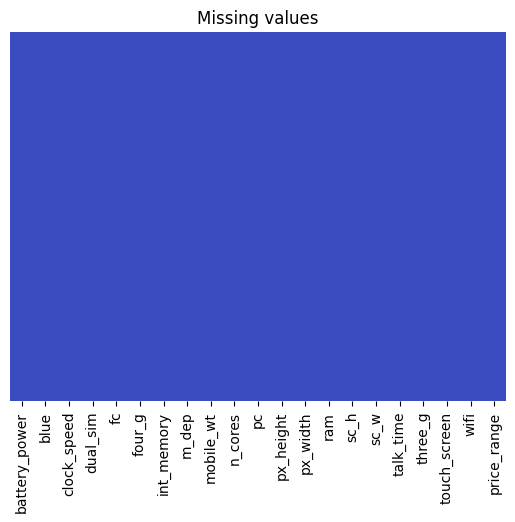

In [ ]:
# Visualizing the missing values
missing_values = dataset.isnull()
sns.heatmap(missing_values,cmap='coolwarm',cbar=False,yticklabels=False)
plt.title('Missing values')
plt.show()

### What did you know about your dataset?

In the given dataset, there are 21 columns and 2000 rows. Among the 21 columns, 20 are independent variables, and one is a dependent variable. There are no duplicate values or missing values in the dataset

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Dataset Describe
dataset.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Variables Description

Battery_power : Total energy a battery can store in one time measured in mAh

Blue : Has bluetooth or not

Clock_speed : speed at which microprocessor executes instructions

Dual_sim : Has dual sim support or not

Fc : Front Camera mega pixels

Four_g : Has 4G or not

Int_memory : Internal Memory in Gigabytes

M_dep : Mobile Depth in cm

Mobile_wt : Weight of mobile phone

N_cores : Number of cores of processor

Pc : Primary Camera mega pixels

Px_height : Pixel Resolution Height

Px_width : Pixel Resolution Width

Ram : Random Access Memory in Mega

Touch_screen : Has touch screen or not

Wifi : Has wifi or not

Sc_h : Screen Height of mobile in cm

Sc_w : Screen Width of mobile in cm

Talk_time : longest time that a single battery charge will last when you are

Three_g : Has 3G or not

Wifi : Has wifi or not

Price_range : This is the target variable with value of 0(low cost), (medium cost),2(high cost) and 3(very high cost).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
 print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  battery_power is 1094
No. of unique values in  blue is 2
No. of unique values in  clock_speed is 26
No. of unique values in  dual_sim is 2
No. of unique values in  fc is 20
No. of unique values in  four_g is 2
No. of unique values in  int_memory is 63
No. of unique values in  m_dep is 10
No. of unique values in  mobile_wt is 121
No. of unique values in  n_cores is 8
No. of unique values in  pc is 21
No. of unique values in  px_height is 1137
No. of unique values in  px_width is 1109
No. of unique values in  ram is 1562
No. of unique values in  sc_h is 15
No. of unique values in  sc_w is 19
No. of unique values in  talk_time is 19
No. of unique values in  three_g is 2
No. of unique values in  touch_screen is 2
No. of unique values in  wifi is 2
No. of unique values in  price_range is 4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df = dataset.copy()

In [ ]:
# Write your code to make your dataset analysis ready.
numerical_columns = df[['battery_power', 'clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram','sc_h','sc_w','talk_time']]

categorical_columns = df[['blue','dual_sim','four_g','three_g','touch_screen','wifi']]

In [ ]:
numerical_columns

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [ ]:
categorical_columns

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


### What all manipulations have you done and insights you found?

I have created separate numerical and categorical columns for EDA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-17-918ad08936be>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['price_range'],color="y")


<Axes: xlabel='price_range', ylabel='Density'>

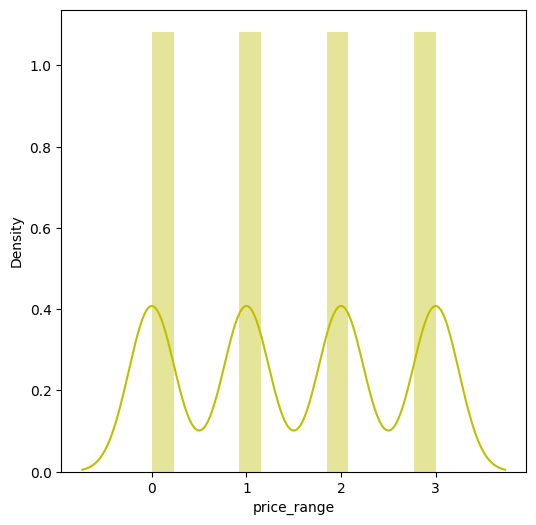

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(6,6))
sns.distplot(dataset['price_range'],color="y")

##### 1. Why did you pick the specific chart?

I wanted to check the data distribution of the dependent variable(price_range).

##### 2. What is/are the insight(s) found from the chart?

The dataset has almost normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if a variable is skewed, it can lead to bias predictions, influence the mean and median, and potentially affect model assumptions.

#### Chart - 2

<ipython-input-135-3de045ab1423>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[cols])
<ipython-input-135-3de045ab1423>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[cols])
<ipython-input-135-3de045ab1423>:6: UserWarning: 

`distplot` is a deprecated function and will be rem

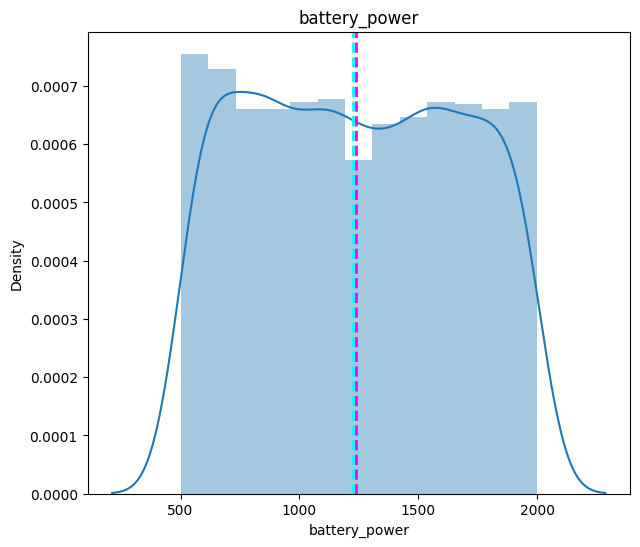

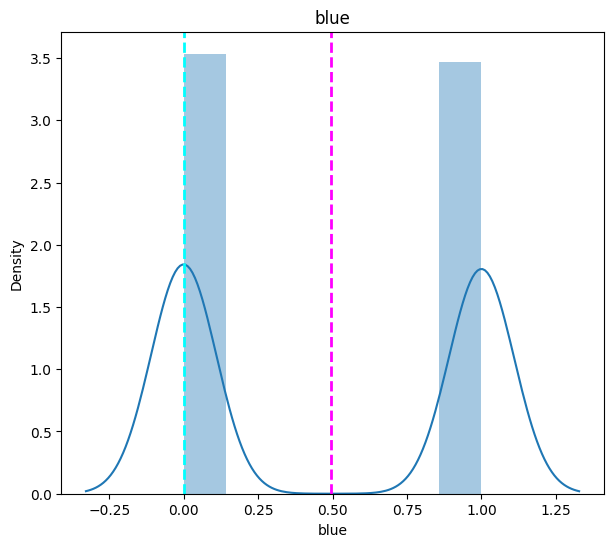

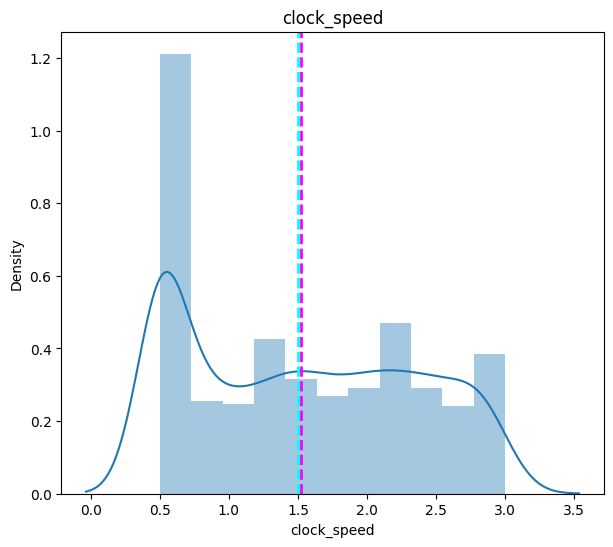

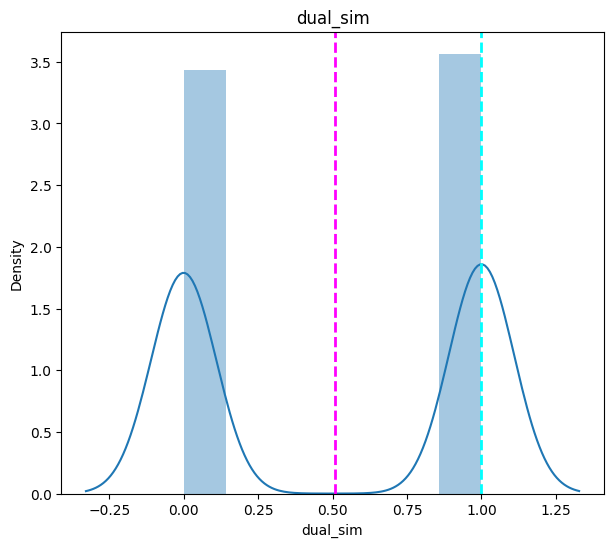

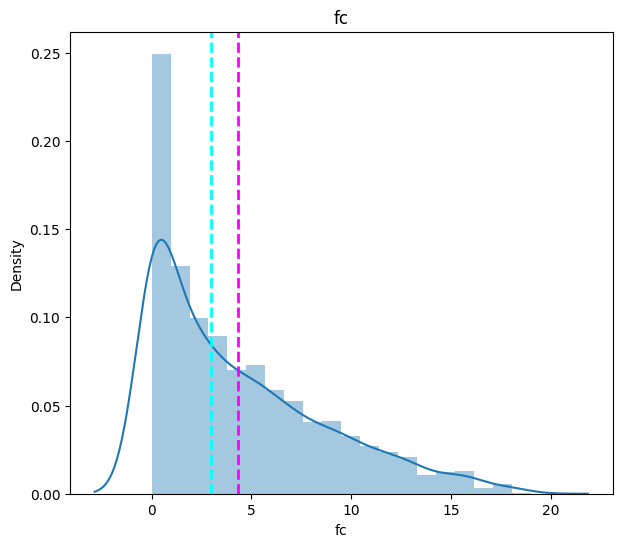

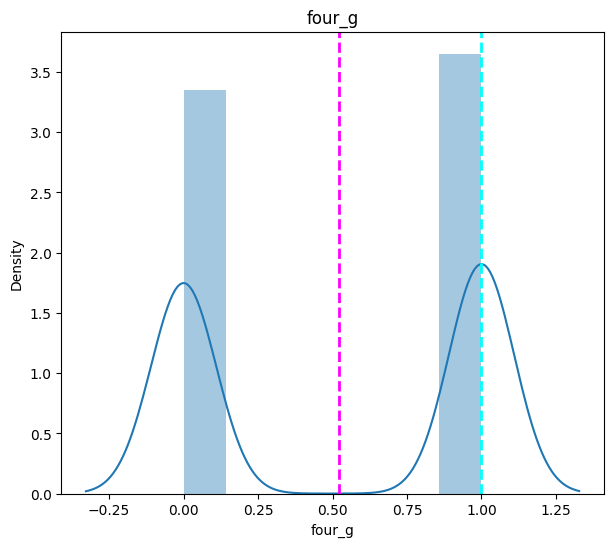

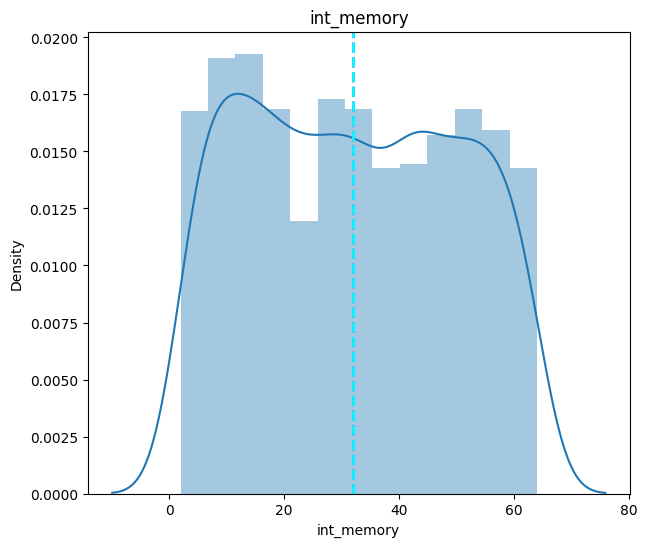

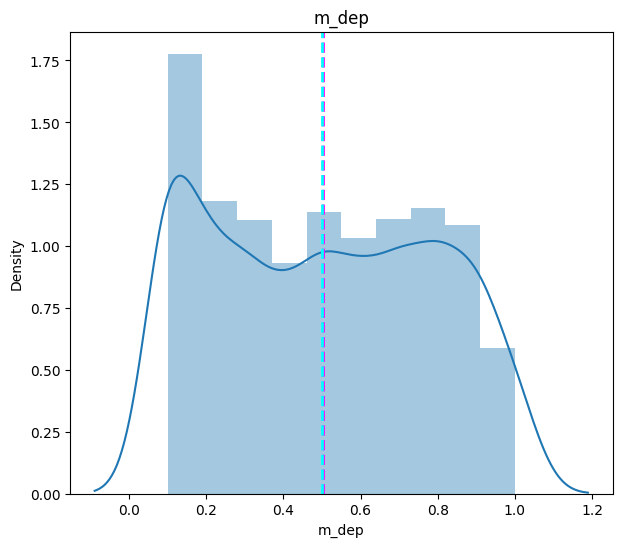

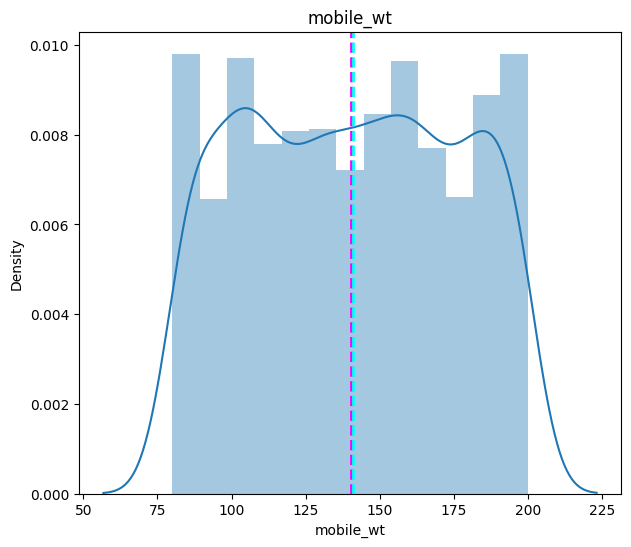

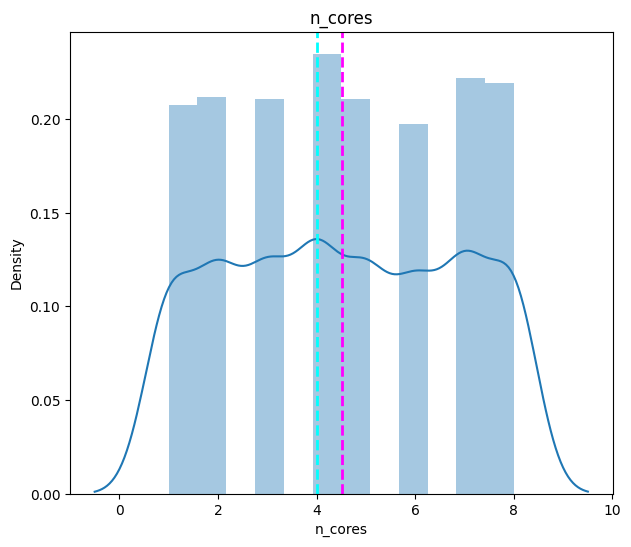

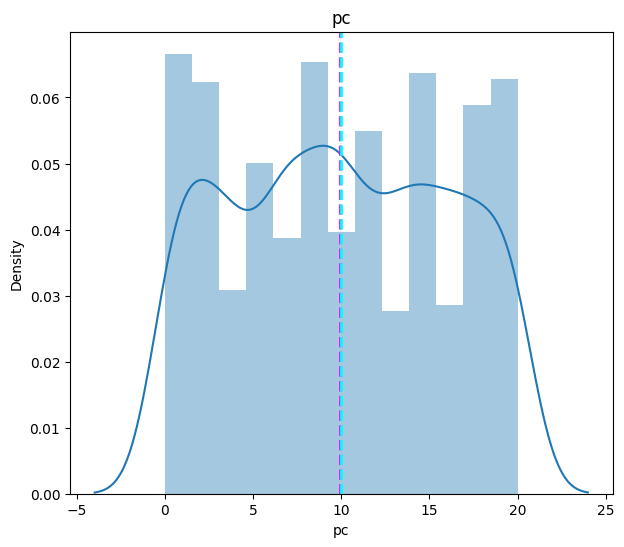

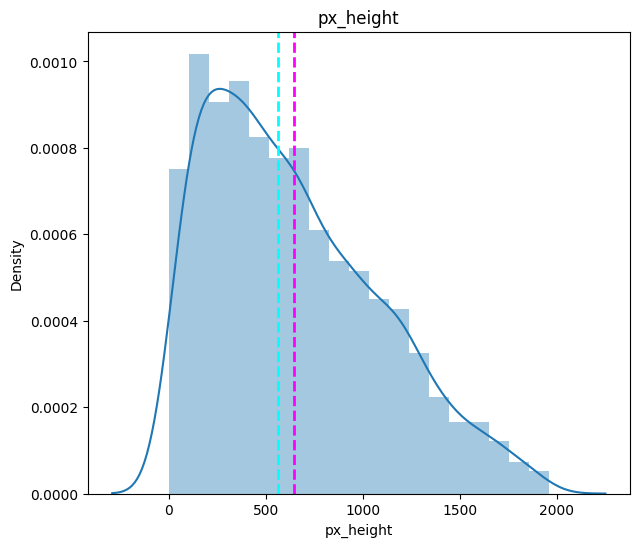

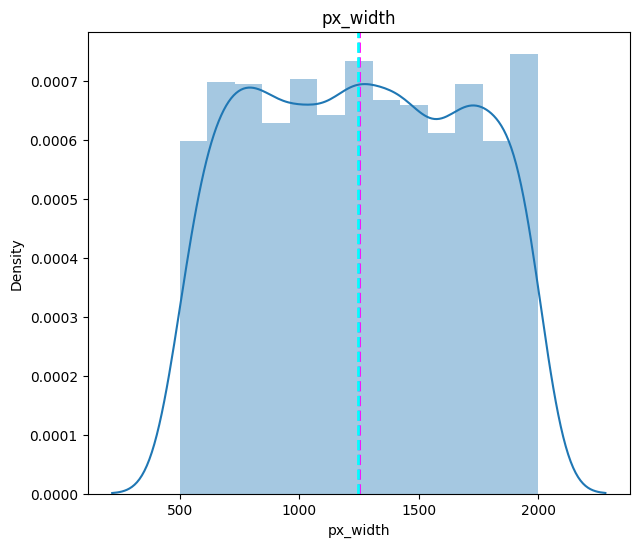

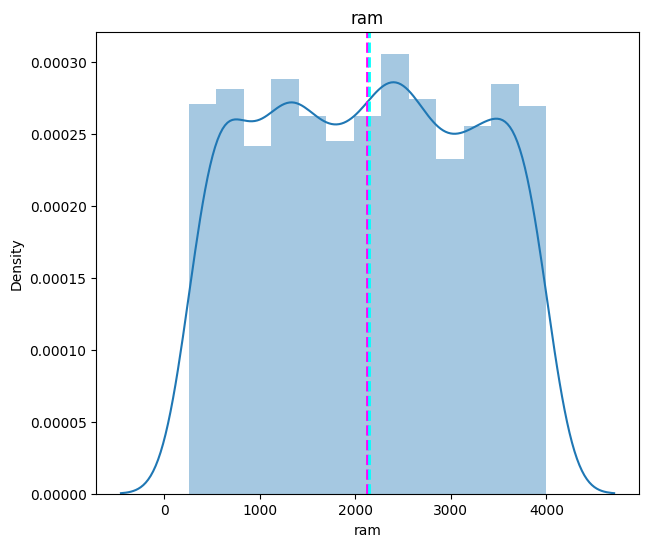

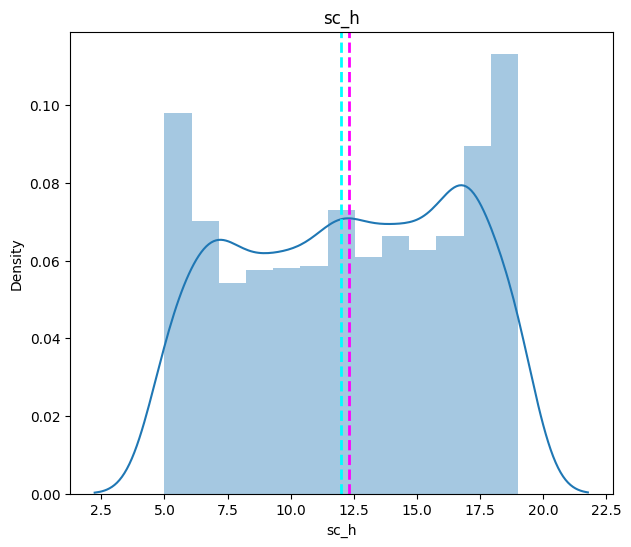

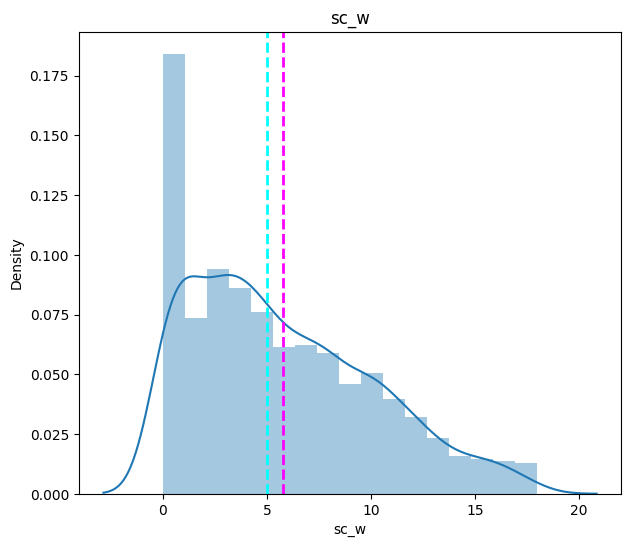

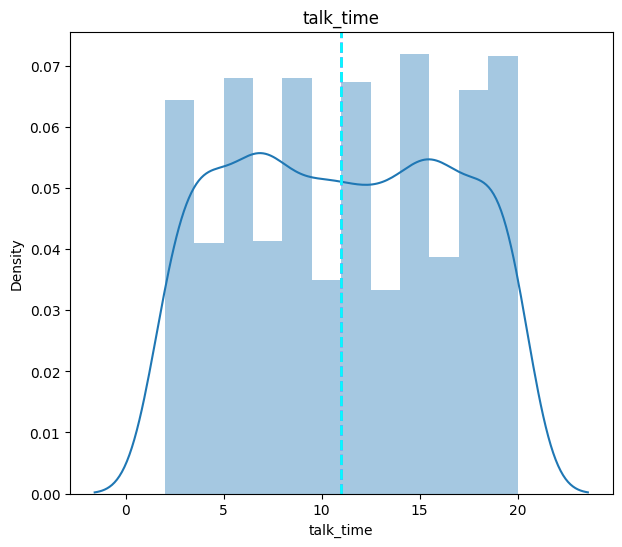

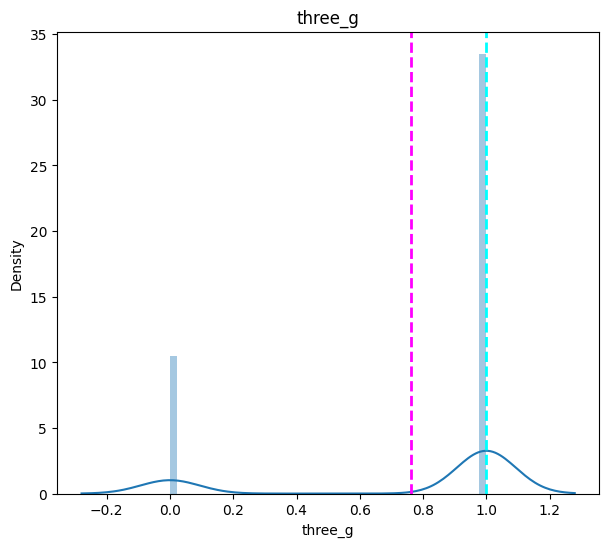

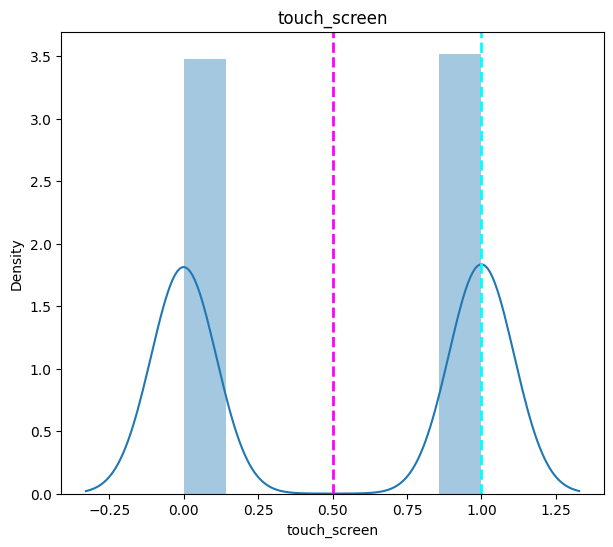

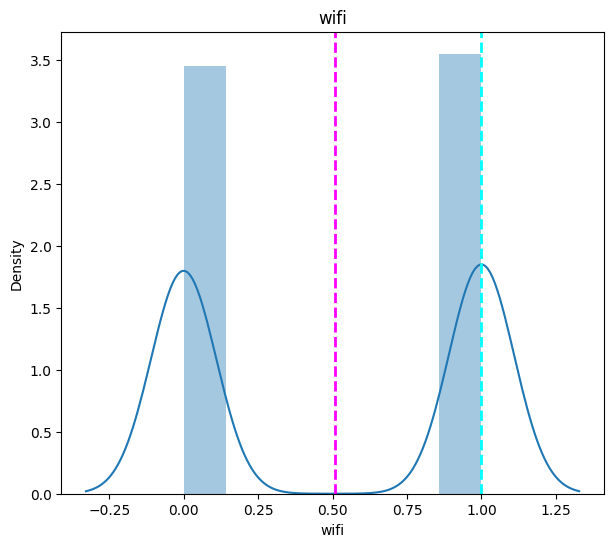

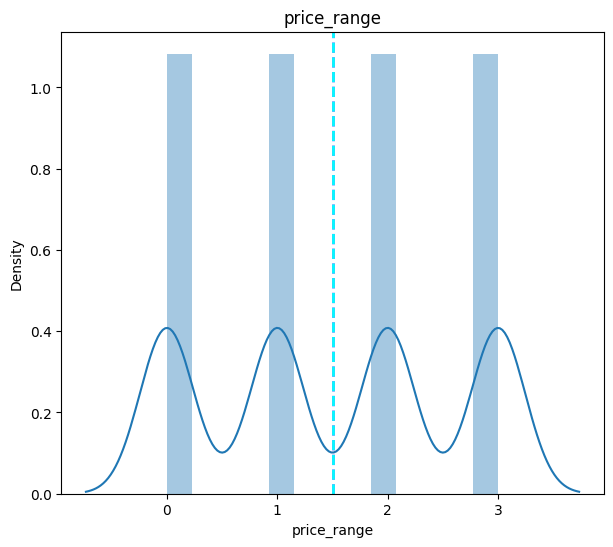

In [ ]:
# Chart - 2 visualization code
for cols in dataset.describe().columns:
  fig = plt.figure(figsize=(7,6))
  ax = fig.gca()
  feature = (dataset[cols])
  sns.distplot(dataset[cols])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(cols)
plt.show()

##### 1. Why did you pick the specific chart?

I used distplot to visualize the difference between the mean and median values.

##### 2. What is/are the insight(s) found from the chart?

Some columns are not normally distributed, so we need to address that before implementing the models.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,Because certain columns (such as 'dual_sim,' 'four_g,' 'touch_screen,' and 'wifi') exhibit differences in their mean and median values.

#### Chart - 3

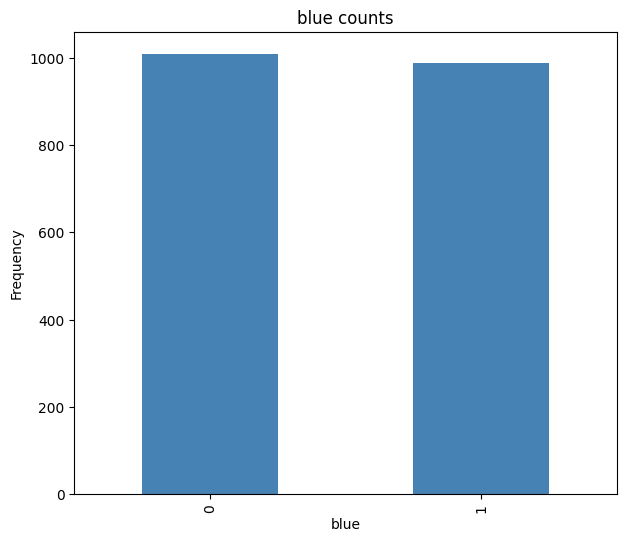

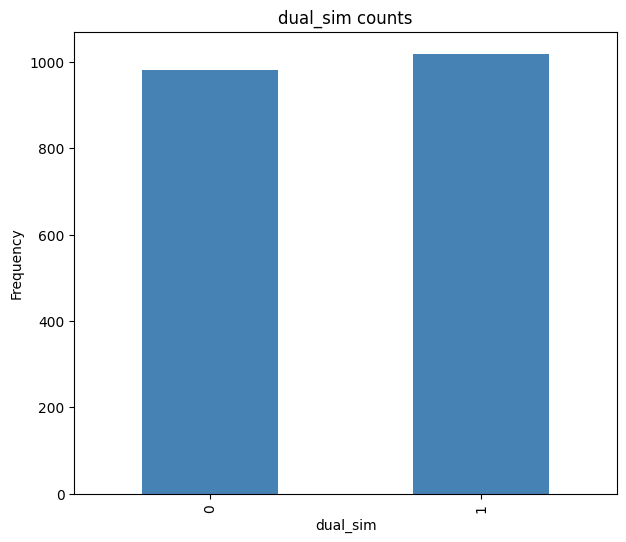

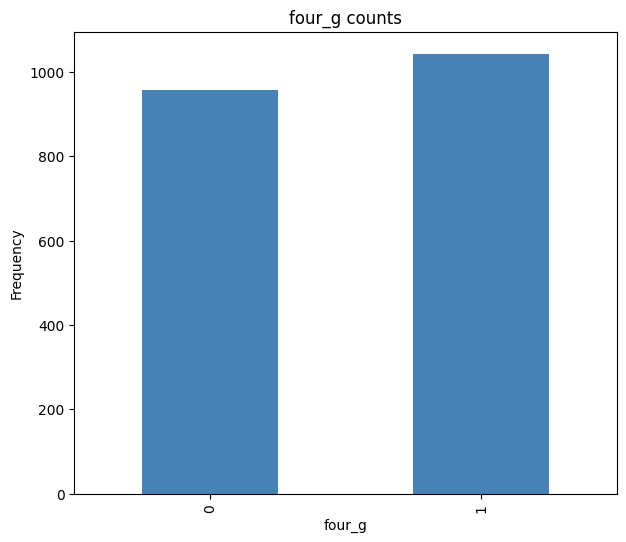

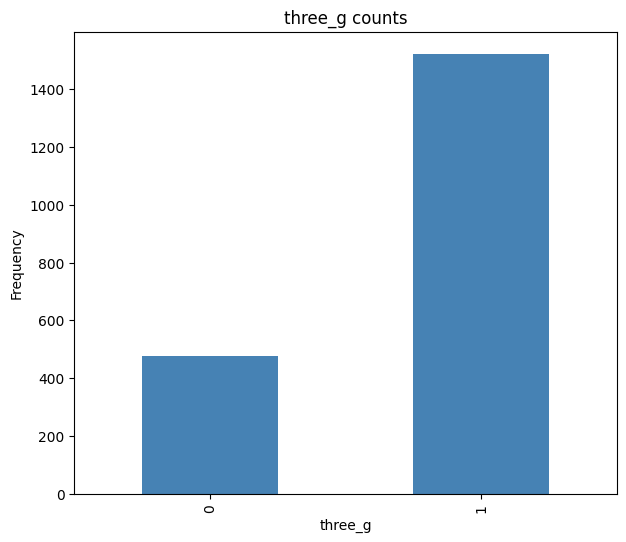

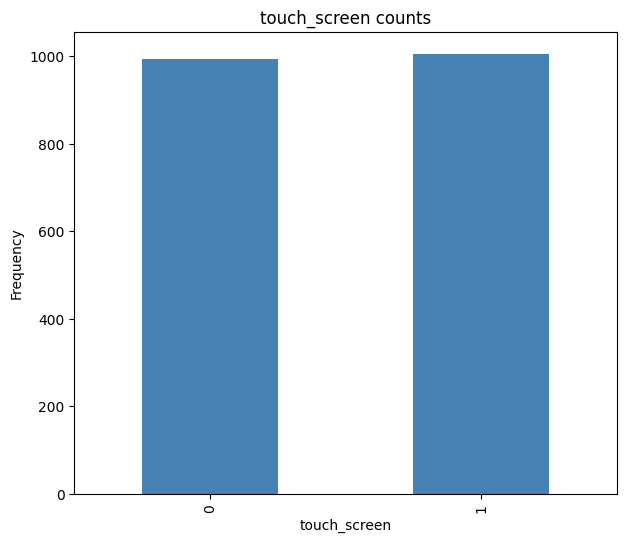

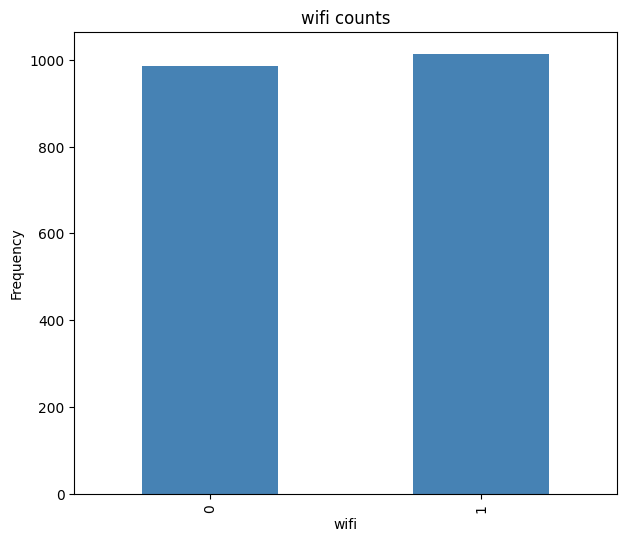

In [ ]:
# Chart - 3 visualization code
for col in categorical_columns:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(7, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

Here, I have used a barplot to count the data distribution of the categorical columns. We can use a boxplot to display the data distribution.

##### 2. What is/are the insight(s) found from the chart?

All the columns have almost the same data in the categorical columns, except for the 'three_g_counts' column.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because before making any assumptions, it's very important to have a comprehensive understanding of your dataset's distribution.

#### Chart - 4

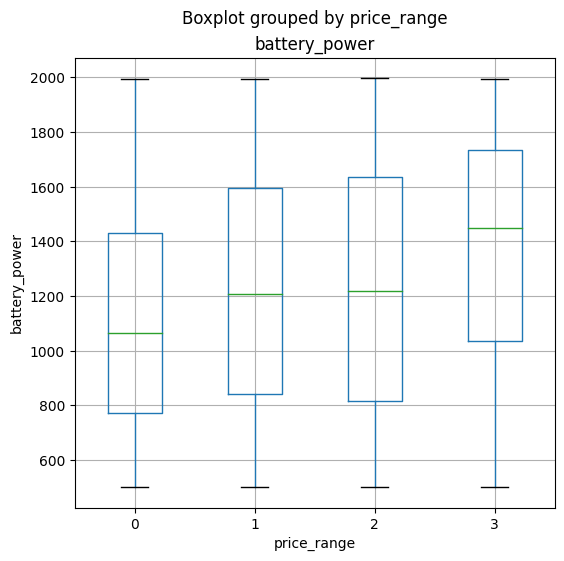

In [ ]:
# Chart - 4 visualization code
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
df.boxplot(column = 'battery_power', by = 'price_range', ax = ax)
ax.set_ylabel("battery_power")
plt.show()

##### 1. Why did you pick the specific chart?

I used a boxplot to observe the data distribution of the 'price_range' and 'battery_power' columns

##### 2. What is/are the insight(s) found from the chart?

I can clearly see that as the battery power capacity increases, the price of the mobile also increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because we decide the appropriate value of the mobile price based on the customers' battery power requirements, among other factors.

#### Chart - 5

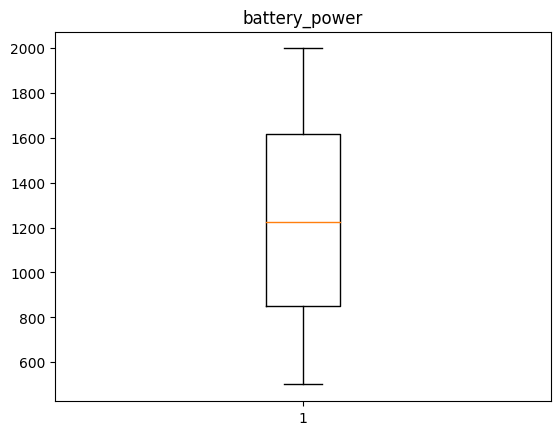

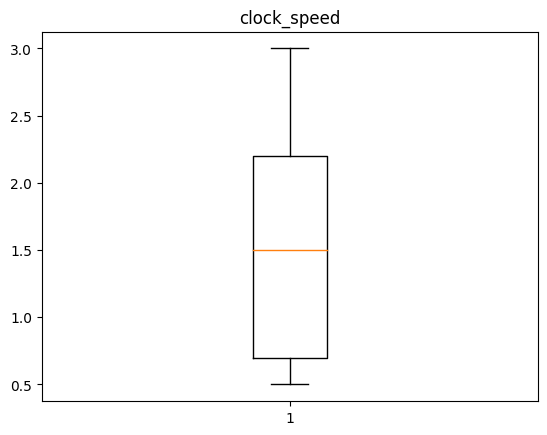

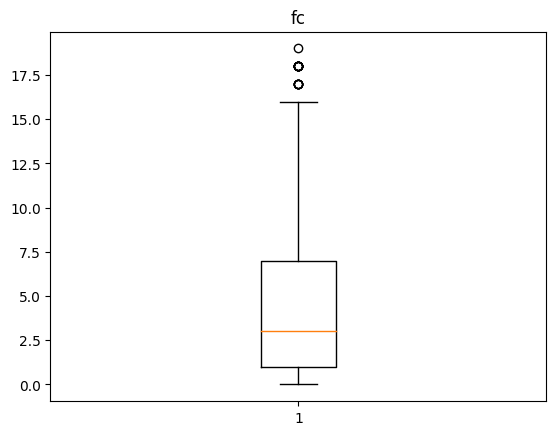

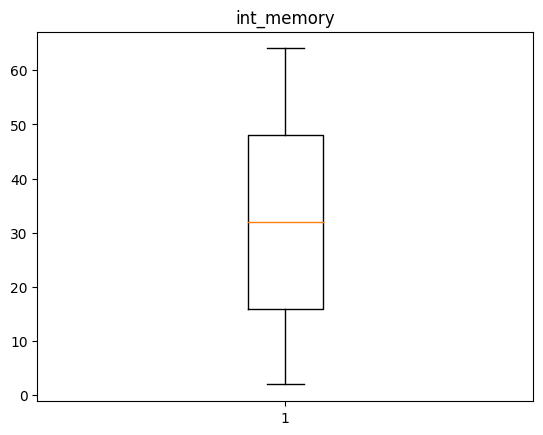

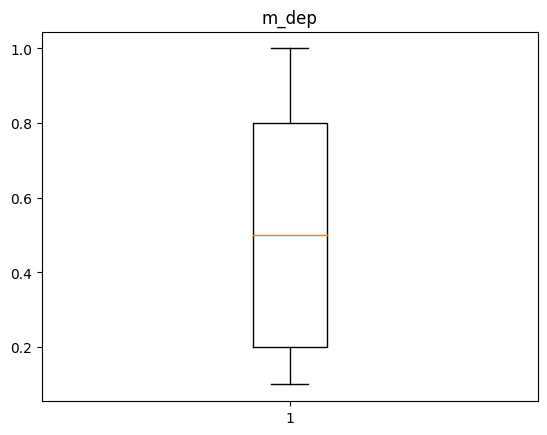

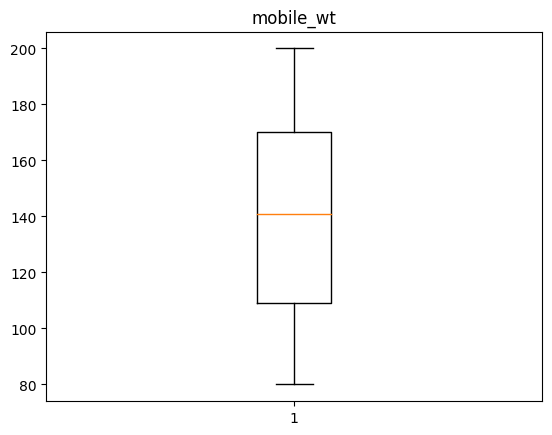

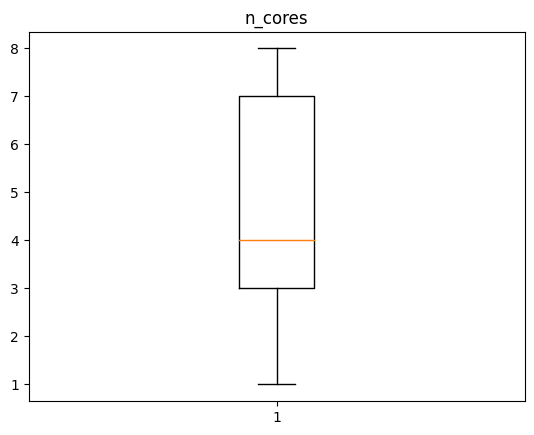

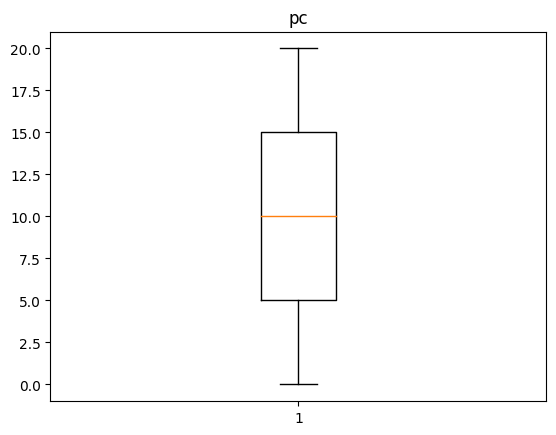

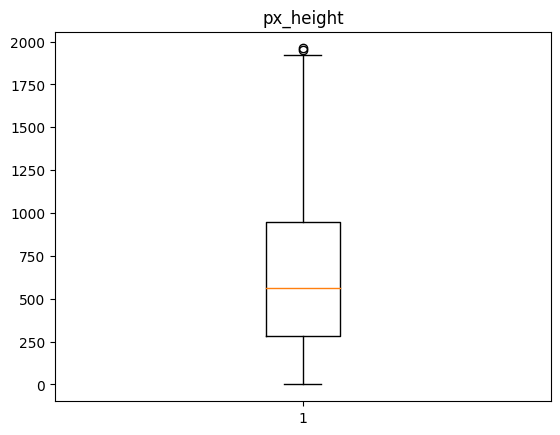

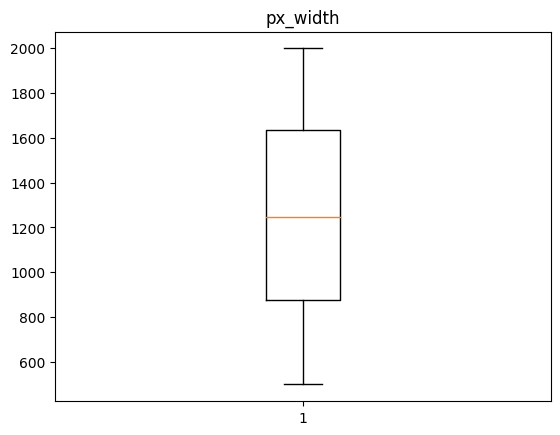

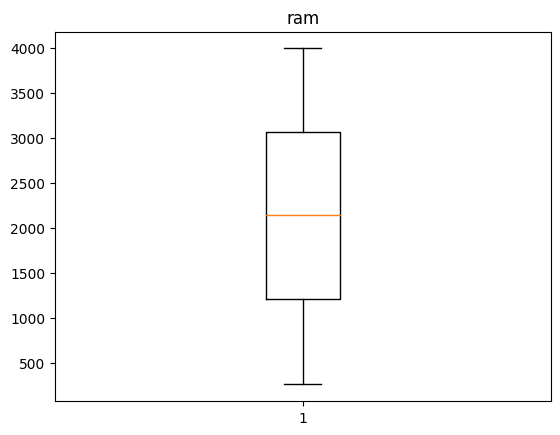

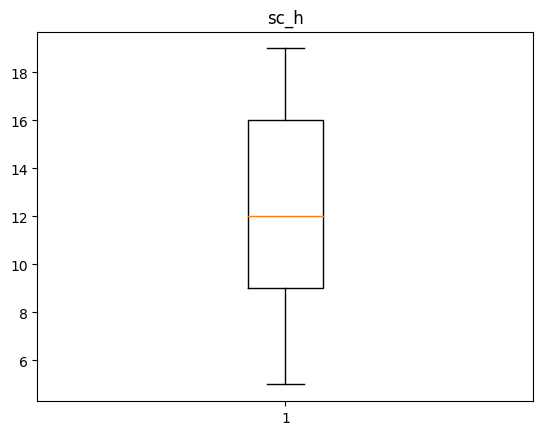

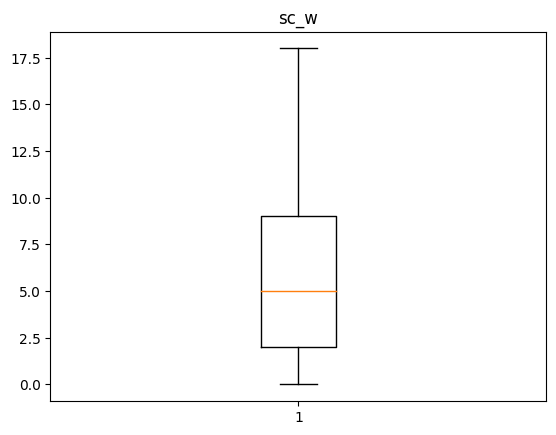

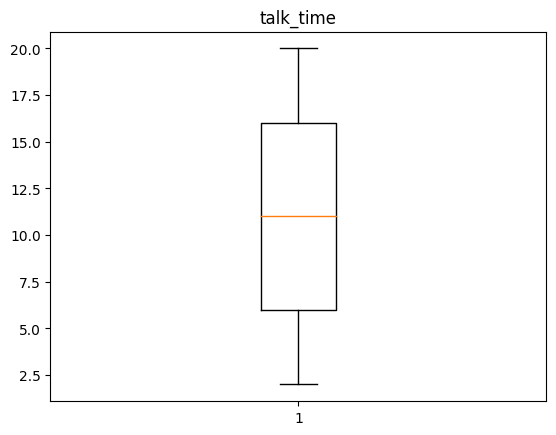

In [ ]:
# Chart - 5 visualization code
for i in numerical_columns:
  plt.boxplot(df[i])
  plt.title(i)
  plt.show()

##### 1. Why did you pick the specific chart?

I have used the boxplot to visualize whether there are any outliers in the dataset or not because boxplots offer a quick and informative way to understand the distribution, variability, and potential outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

There are some outliers in the columns 'fc' and 'px_height'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,beacuse outliers can significantly impact a model's performance, influencing its accuracy, bias, variance, adherence to model assumptions, and the overall robustness of the model. Handling outliers appropriately is crucial to ensure the model's reliability in making predictions.

#### Chart - 6

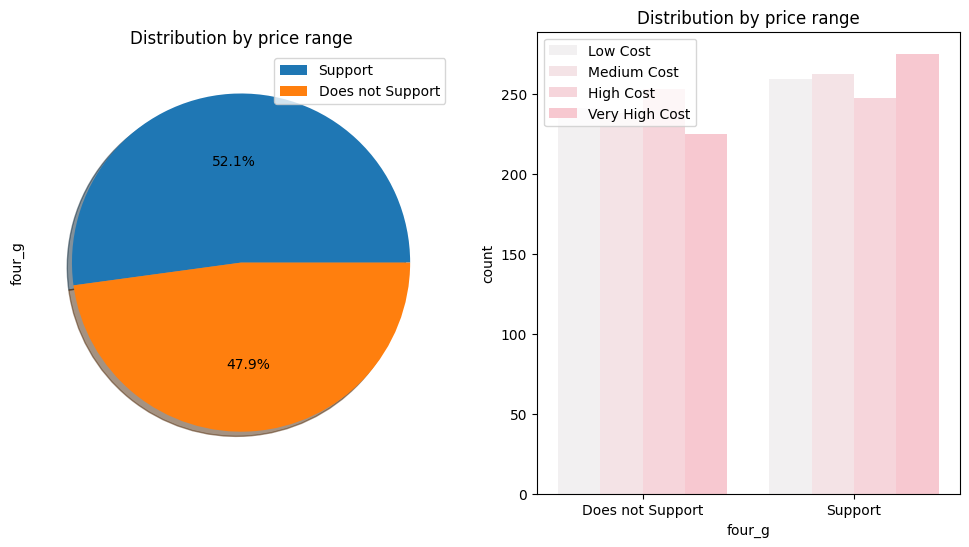

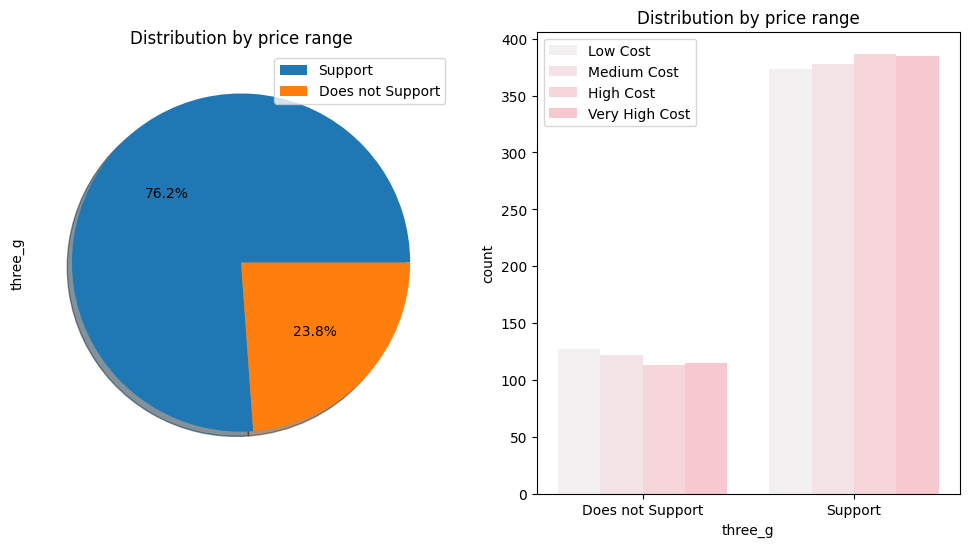

In [ ]:
# Chart - 6 visualization code
three_g_and_four_g = [ 'four_g', 'three_g']
for col in three_g_and_four_g:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 6))

  dataset[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = dataset, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

I wanted to check the data distribution of the columns 'three_g' and 'four_g', that's why here i used countplot.Countplots are especially useful when dealing with categorical data as they offer a clear visual representation of the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

In columns 'four_g' and 'three_g' we have two category: -

four_g :-

1 - four_g support(52.1%) values

2 - four_g does not support(47.9%) values

three_g :-

1 - three_g support(76.2%) values

2 - three_G does not support(23.8%) values


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, while implementing the models, we should keep in mind that in the dataset, there are more phones that support three_g than four_g.

#### Chart - 7

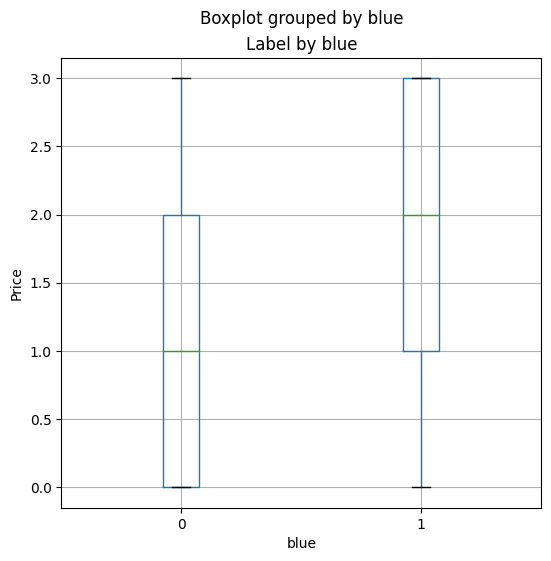

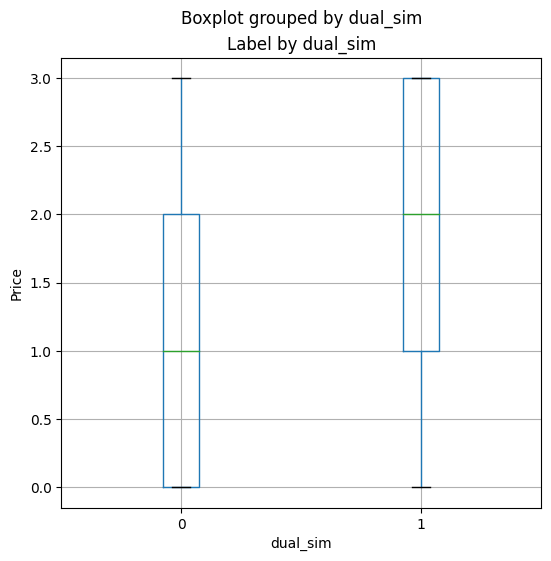

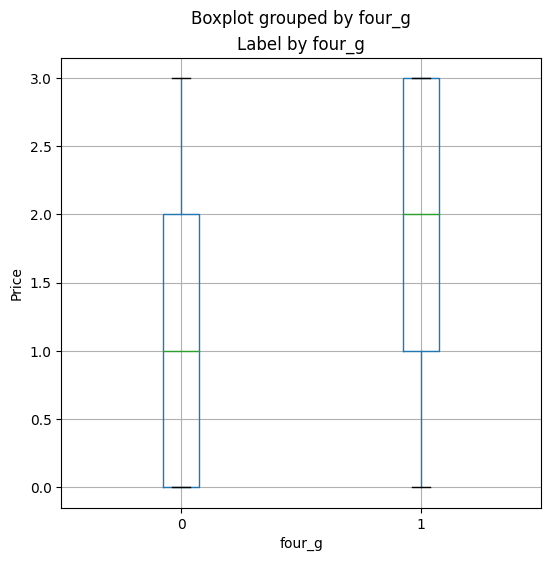

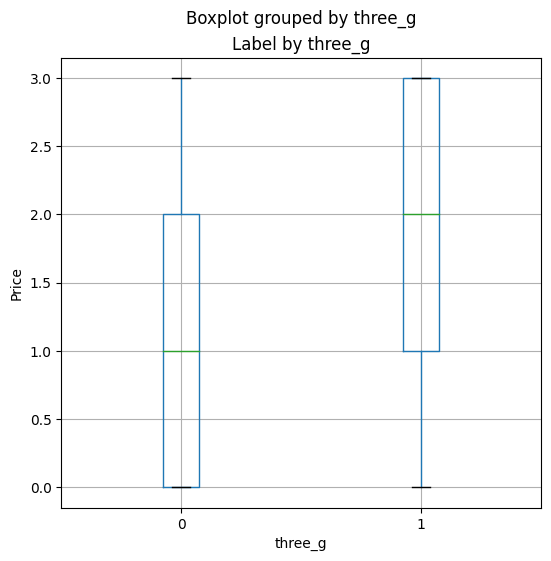

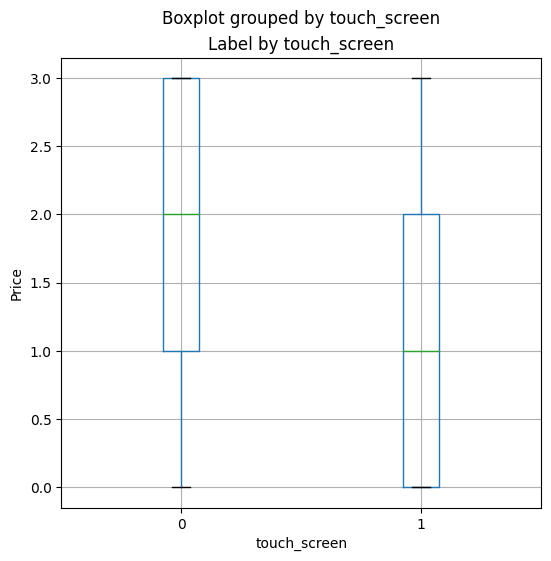

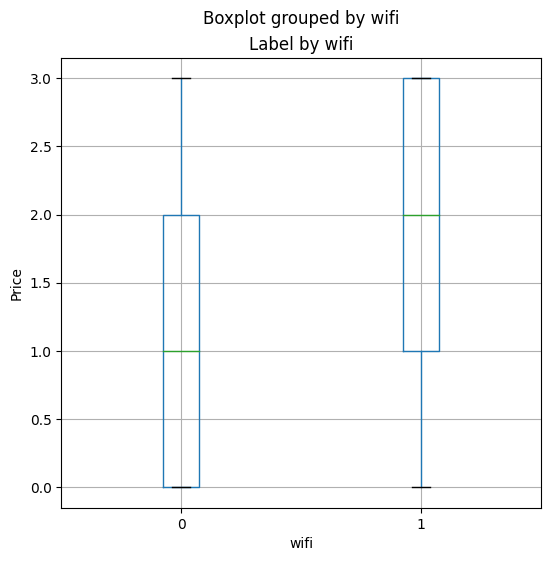

In [ ]:
# Chart - 7 visualization code
for col in categorical_columns[:-1]:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'price_range', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

##### 1. Why did you pick the specific chart?

I used boxplot to see the data distribution of all categorical columns.

##### 2. What is/are the insight(s) found from the chart?

Blue :- There are more values in 0 than 1

Dual_sim :- There are more values in 1 than 0

Three_g :- There are more values in 1 than 0

Four_g : - here are more values in 1 than 0

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,it's very important to get the comprehensive idea about the dataset.

#### Chart - 8

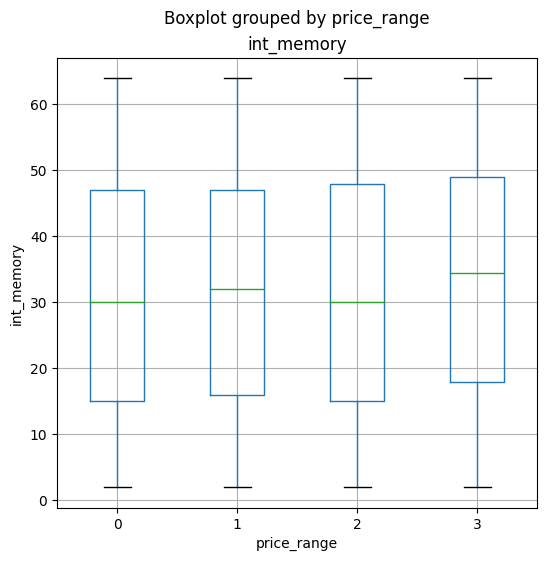

In [ ]:
# Chart - 8 visualization code
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
df.boxplot(column = 'int_memory', by = 'price_range', ax = ax)
ax.set_ylabel("int_memory")
plt.show()

##### 1. Why did you pick the specific chart?

I have used the boxplot to visualize the dataset distribution in columns 'price_range' and 'int_memory' because boxplots offer a quick and informative way to understand the distribution, variability, and potential outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Distribution is almost same in the both columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is very important to analyze the dependency of the dependent variable on all independent variables because it can influence its direction, either positively or negatively.

#### Chart - 9

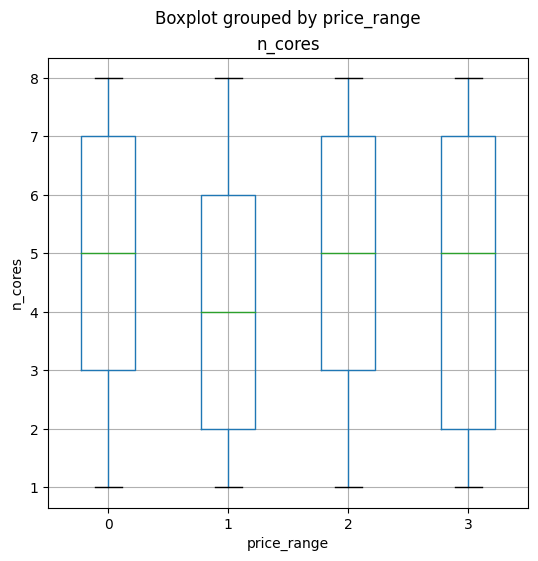

In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize=(6, 6))
ax = fig.gca()
df.boxplot(column = 'n_cores', by = 'price_range', ax = ax)
ax.set_ylabel("n_cores")
plt.show()

##### 1. Why did you pick the specific chart?

I have used the boxplot to visualize the dataset distribution in columns 'price_range' and 'int_memory' because boxplots offer a quick and informative way to understand the distribution, variability, and potential outliers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Distribution is almost same in the both columns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It is very important to analyze the dependency of the dependent variable on all independent variables because it can influence its direction, either positively or negatively.

#### Chart - 10

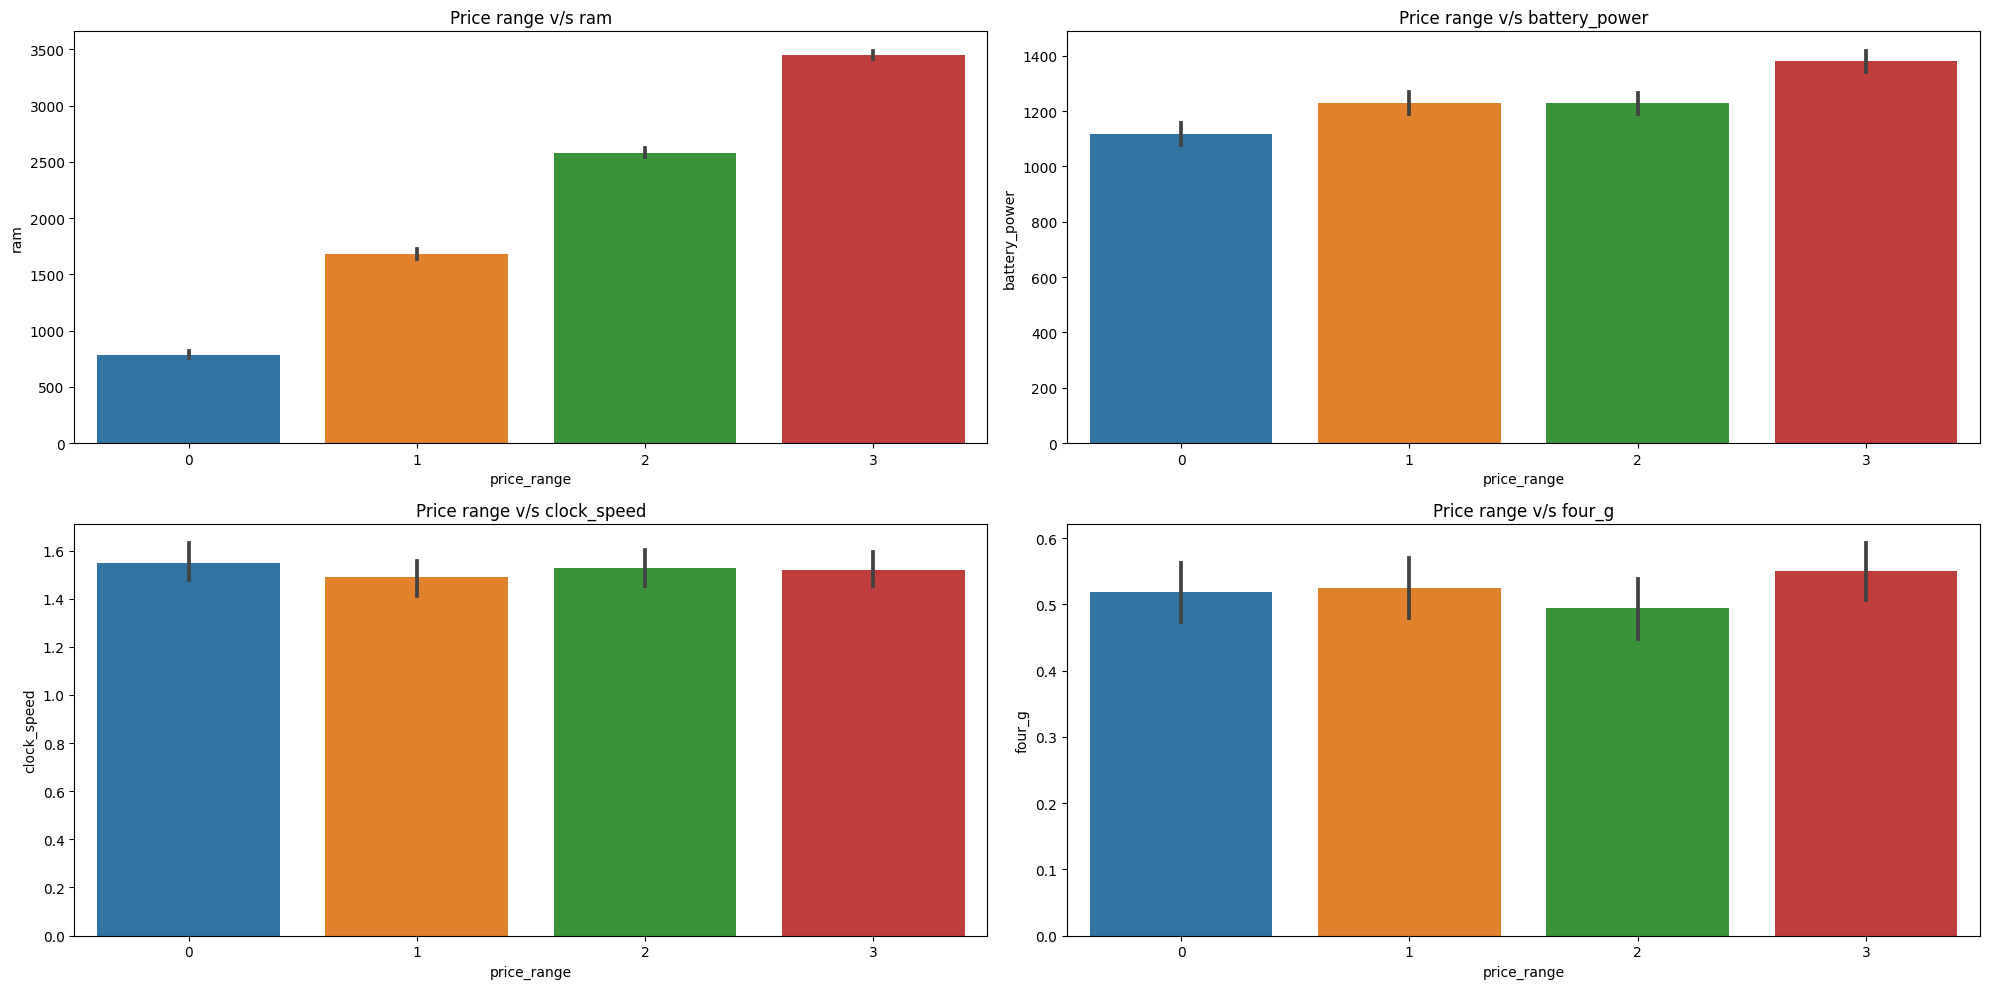

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(20,10))

labels=['0 = Low','1 = Medium','2 = High','3 = Very_high']

rows=2
cols=2
counter=1

variables=['ram','battery_power','clock_speed','four_g']

for var in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[var])
  plt.title(f'Price range v/s {var}')
  counter=counter+1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Combining subplots and boxplots in EDA allows for a more comprehensive and comparative analysis of multiple variables or categories within a dataset, facilitating a deeper understanding of their distributions and relationships.

##### 2. What is/are the insight(s) found from the chart?

RAM: -
We can clearly see that as the RAM increases, it directly impacts the mobile price.

Battery Power: -
An increase in battery power results in a slight increase in the price range.

Clock Speed and Four_G: -
Clock speed and Four_G do not influence the price as significantly as RAM and battery power do.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,because the mobile price can be directly impacted by the the ram.

#### Chart - 11

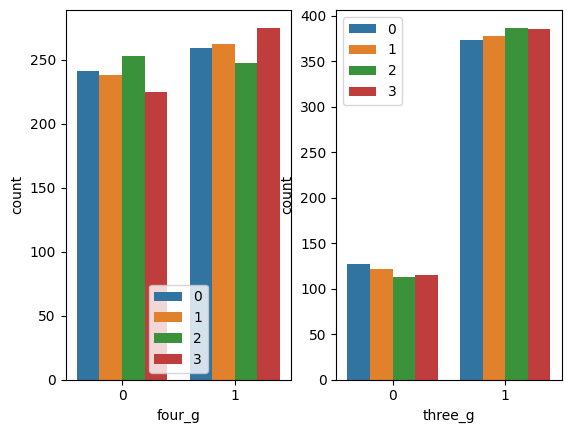

In [ ]:
# Chart - 11 visualization code
plt.figure(1)
plt.subplot(121)
sns.countplot(x = 'four_g',hue= 'price_range',data  = df)
plt.legend()
plt.subplot(122)
sns.countplot(x = 'three_g',hue= 'price_range',data  = df)
plt.legend()

##### 1. Why did you pick the specific chart?

I used countplot to check the data distribution of the columns 'three_g' and 'four_g', that's why here i used countplot.Countplots are especially useful when dealing with categorical data as they offer a clear visual representation of the frequency of each category.

##### 2. What is/are the insight(s) found from the chart?

In columns 'four_g' and 'three_g' we have two category: -

For the 'four_g' column, there is a greater amount of data in the 'four_g support' category compared to 'does not support.'

Regarding the 'three_g' column, we have nearly equal numbers in the 'three_g support' and 'does not support' categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,it can us while implementing the models.

#### Chart - 12

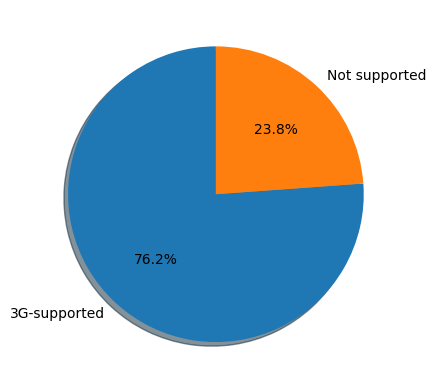

In [ ]:
# Chart - 12 visualization code
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

I used subplot to check the data distribution of the three_g column.

##### 2. What is/are the insight(s) found from the chart?

There is 76.2% of data in the '3G supported' category and 23.8% in the '3G not supported' category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When a phone comes with 3G support, it can increase the price of that mobile. Therefore, it's crucial to analyze whether the phone supports 3G or not.

#### Chart - 13

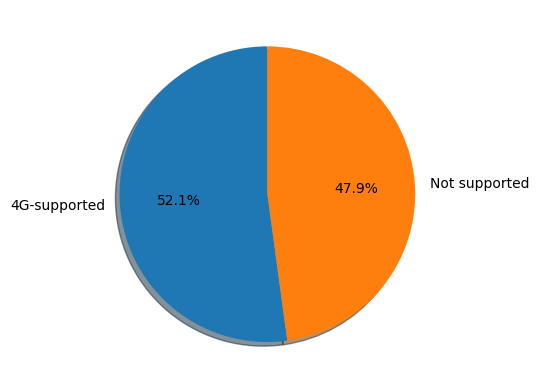

In [ ]:
# Chart - 13 visualization code
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

##### 1. Why did you pick the specific chart?

I used subplot to check the data distribution of the four_g column.

##### 2. What is/are the insight(s) found from the chart?

There is 52.1% of data in the '4G supported' category and 47.9% in the '4G not supported' category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

When a phone comes with 4G support, it can increase the price of that mobile. Therefore, it's crucial to analyze whether the phone supports 4G or not.

#### Chart - 14 - Correlation Heatmap

In [ ]:
corr = dataset.corr()

<Axes: >

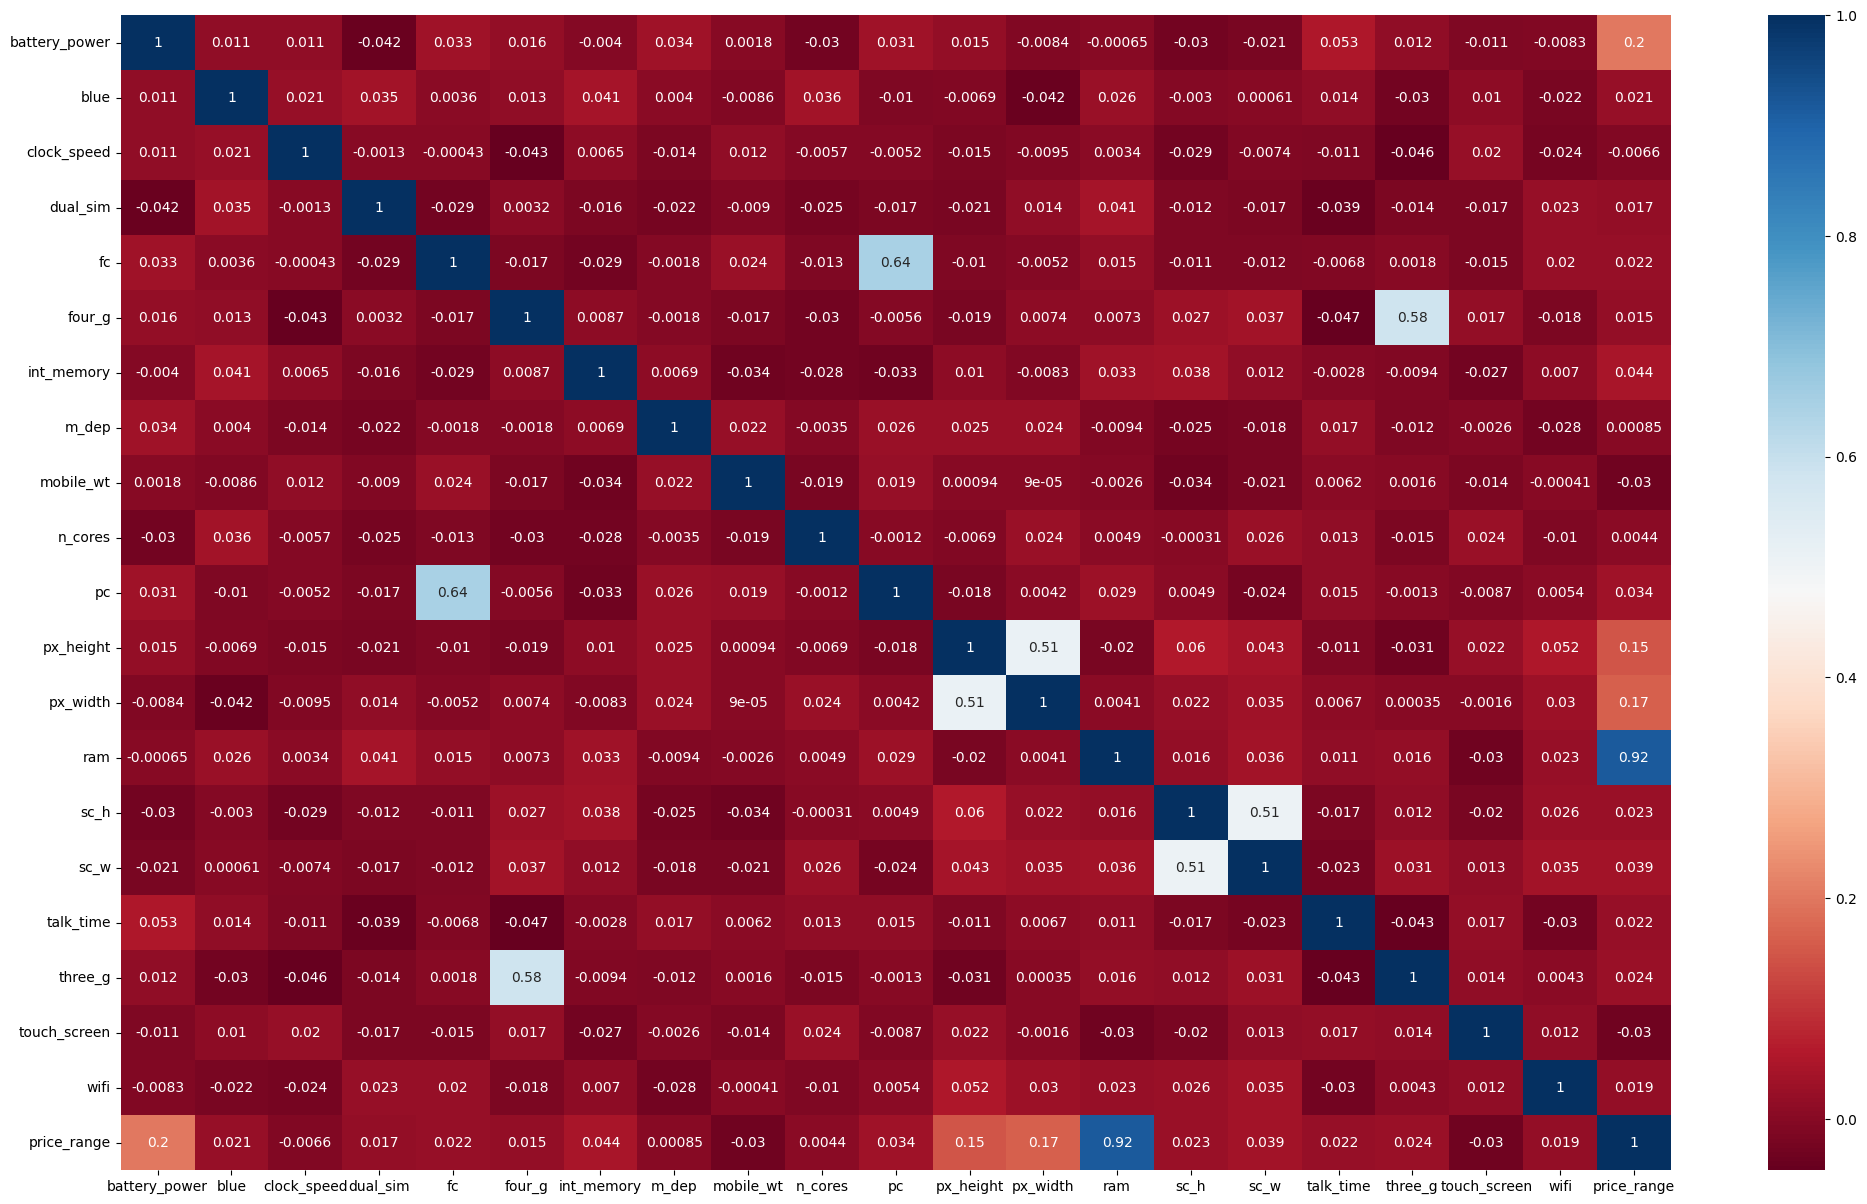

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cmap='RdBu')

##### 1. Why did you pick the specific chart?

Heatmaps are graphical representations of data where values are depicted using color gradients.Heatmaps can display relationships between two sets of data by using color intensity to represent the strength or magnitude of that relationship.They are useful for comparing multiple variables or categories simultaneously.

##### 2. What is/are the insight(s) found from the chart?

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.
There are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind ='kde')

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that enables the exploration of relationships between all pairs of variables in a dataset. It is a valuable tool for data analysis as it facilitates a quick understanding of how variables in a dataset relate to each other.

Therefore, we utilized a pair plot to analyze the data patterns and relationships between features. It functions similarly to a correlation map, but it provides a graphical representation, allowing for a visual understanding of these relationships.

##### 2. What is/are the insight(s) found from the chart?

There is a positive correlation between battery power and RAM and pixel height and pixel width.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1- In 25% mobiles the three_g is not available and in 75% mobiles three_g is available

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The proportion of times when three_G is not available is <= 0.25, and the proportion of times when three_G is available is>=0.75.

Alternative Hypothesis (Ha): The proportion of times when three_G is not available is > 0.25, or the proportion of times when three_G is available is < 0.7

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null hypothesis proportions
p_null_failure = 0.25
p_null_success = 0.75

# Calculate the observed proportions
n_failure = np.sum(df.three_g == 0)
n_success = np.sum(df.three_g == 1)
observed_proportion_failure = n_failure / len(df.three_g)
observed_proportion_success = n_success / len(df.three_g)

# Perform a one-sample proportion z-test
p_hat_failure = observed_proportion_failure
p_hat_success = observed_proportion_success
n = len(df.three_g)

# Calculate the standard error
standard_error_failure = np.sqrt(p_null_failure * (1 - p_null_failure) / n)
standard_error_success = np.sqrt(p_null_success * (1 - p_null_success) / n)

# Calculate the z-score for failure and success
z_failure = (p_hat_failure - p_null_failure) / standard_error_failure
z_success = (p_hat_success - p_null_success) / standard_error_success

# Calculate the p-value for the z-test
p_value_failure = 1 - stats.norm.cdf(z_failure)
p_value_success = stats.norm.cdf(z_success)

# Print the results
print("Z-score for failure:", z_failure)
print("P-value for failure:", p_value_failure)
print("Z-score for success:", z_success)
print("P-value for success:", p_value_success)

# Interpret the results
alpha = 0.05                     # Significance level
if p_value_failure < alpha or p_value_success < alpha:
    print("Reject the null hypothesis: The proportion of times when three_G is not available is > 0.25, or the proportion of times when three_G is available is < 0.7")
else:
    print("Null hypothesis accepted: The proportion of times when three_G is not available is <= 0.25, and the proportion of times when three_G is available is>=0.75.")

Z-score for failure: -1.1877148928369423
P-value for failure: 0.8825271228415327
Z-score for success: 1.1877148928369365
P-value for success: 0.8825271228415316
Null hypothesis accepted: The proportion of times when three_G is not available is <= 0.25, and the proportion of times when three_G is available is>=0.75.


##### Which statistical test have you done to obtain P-Value?

I performed a one-sample proportion z-test to obtain the p-values.

##### Why did you choose the specific statistical test?

This z-test is used to assess whether the observed proportion of "failure" in three_g data significantly differs from the assumed proportion specified in the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): Ram and Price Range is dependent to each other.

Alternative hypothesis (Ha): Ram and Price Range are independent for each other.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(df['ram'], df['price_range'])
print(contingency_table)

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Interpret the results
if p < 0.05:
    print("Null hypothesis (H0) accepted Ram and Price Range is dependent to each other.")
else:
    print("Alternative hypothesis (Ha) accetped: Ram and Price Range are independent for each other.")

price_range  0  1  2  3
ram                    
256.0        1  0  0  0
258.0        2  0  0  0
259.0        1  0  0  0
262.0        1  0  0  0
263.0        1  0  0  0
...         .. .. .. ..
3990.0       0  0  0  1
3991.0       0  0  0  2
3993.0       0  0  0  1
3996.0       0  0  0  1
3998.0       0  0  0  1

[1562 rows x 4 columns]
Chi-squared statistic: 5404.666666666667
P-value: 5.726600585736166e-13
Null hypothesis (H0) accepted Ram and Price Range is dependent to each other.


##### Which statistical test have you done to obtain P-Value?

I used chi-squared test to obtain the p-Value.

##### Why did you choose the specific statistical test?

The chi-squared test is commonly used where we to have created a contingency table showing the relationship between "ram" and "price_range. The chi-squared test help me to answer questions like:

Does ram and price range related or independent of each other?

Can we reject the null hypothesis that ram and price range are independent?

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used isnull().sum() to identify null values in the data. Because Missing values led to wrong models prediction.

### 2. Handling Outliers

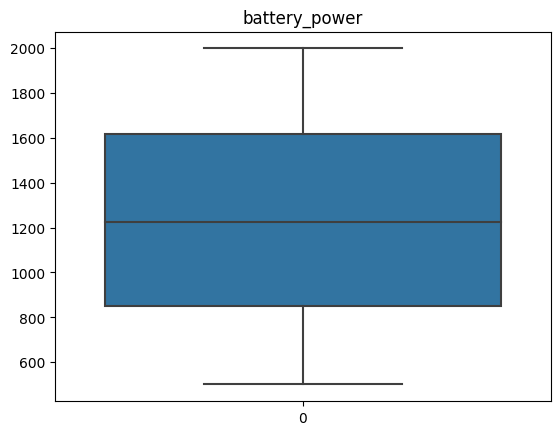

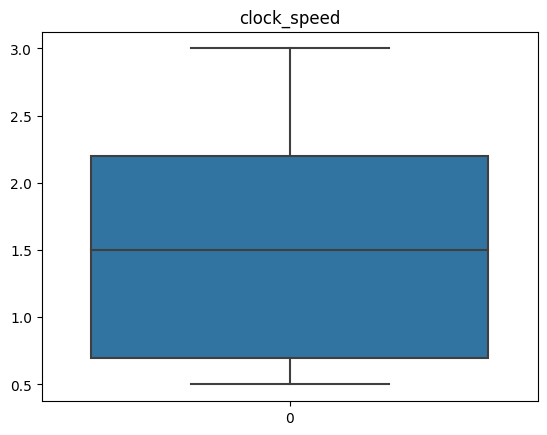

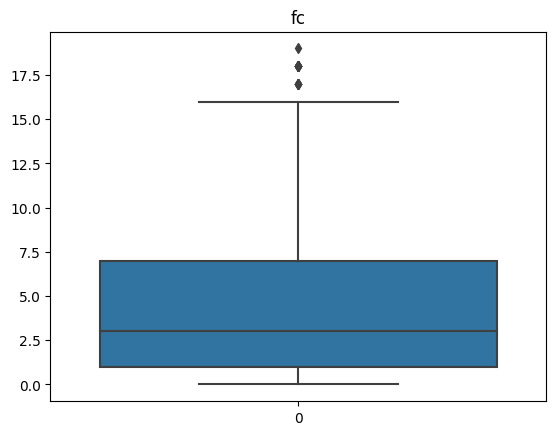

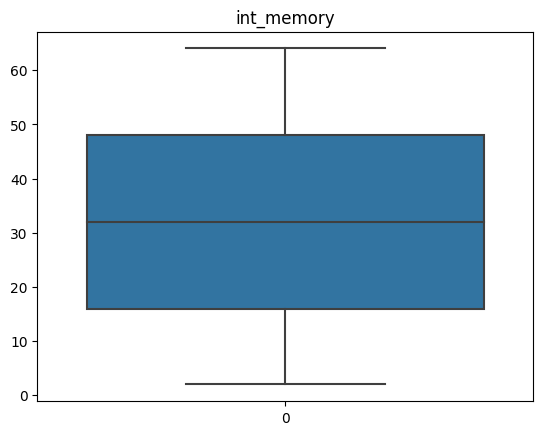

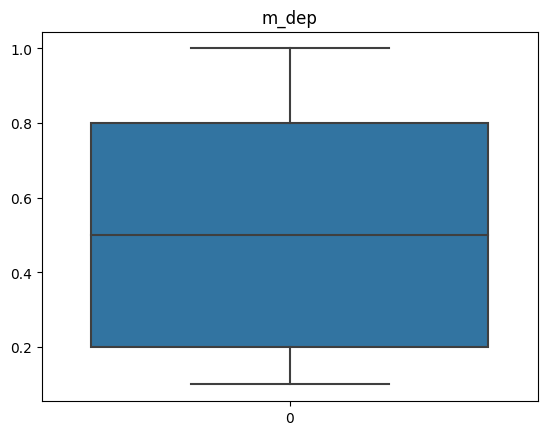

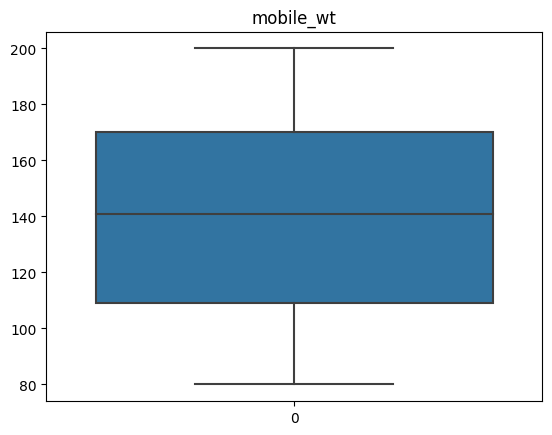

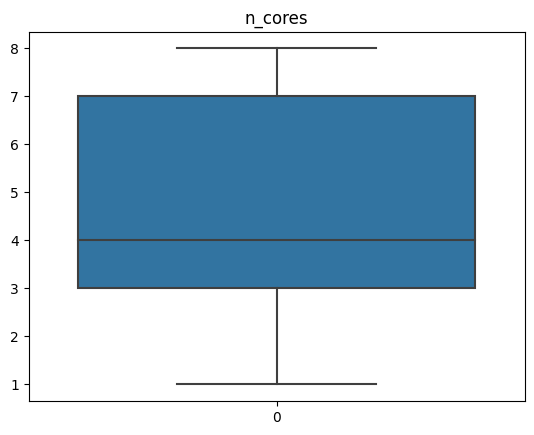

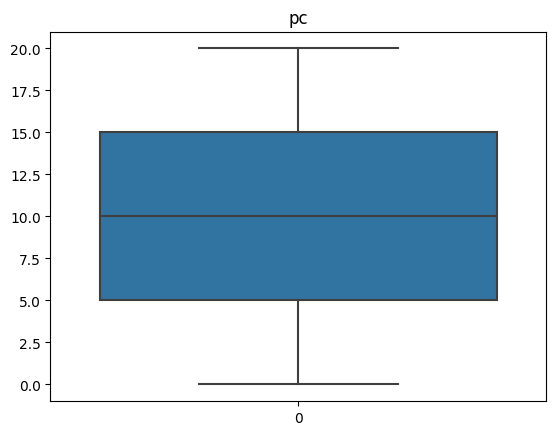

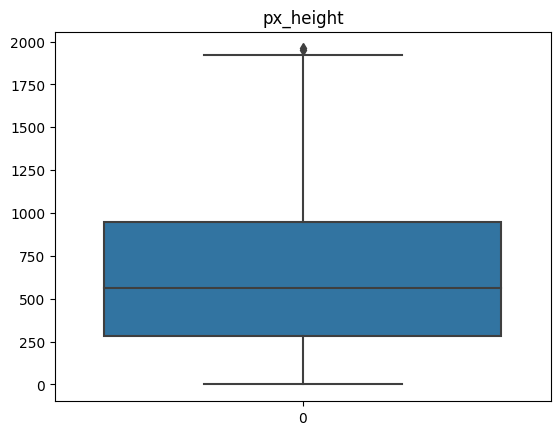

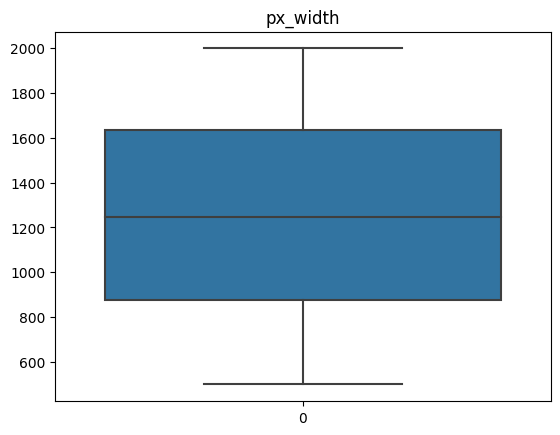

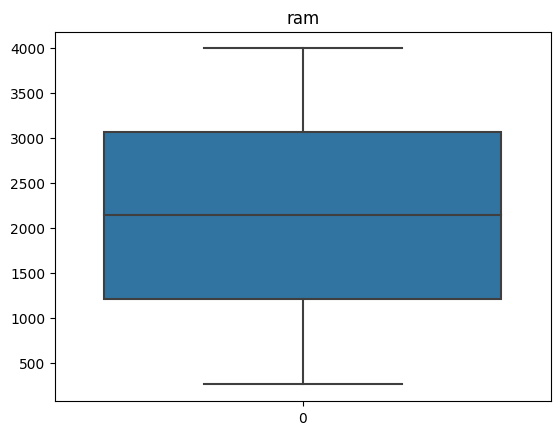

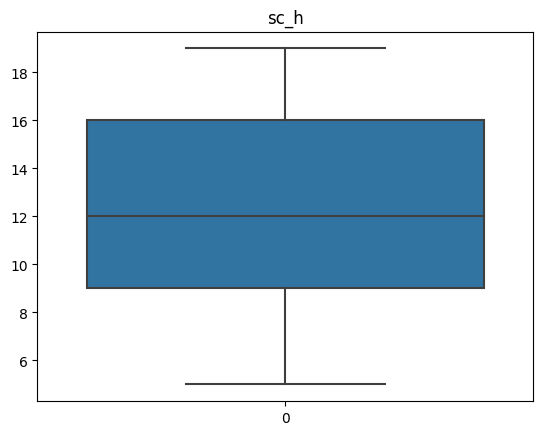

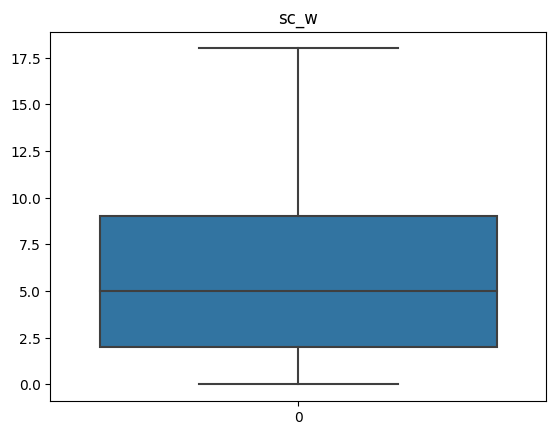

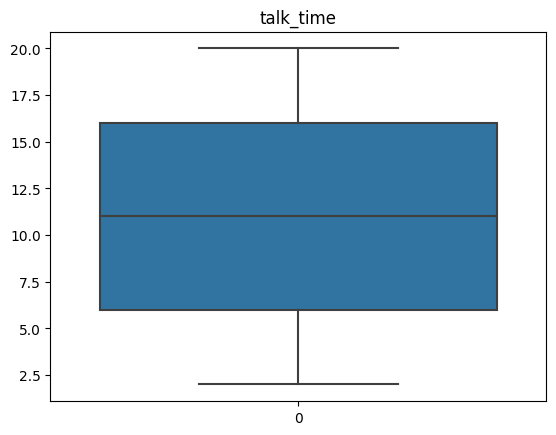

In [ ]:
# Handling Outliers & Outlier treatments
for i in numerical_columns:
  sns.boxplot(numerical_columns[i])
  plt.title(i)
  plt.show()

In [ ]:
column_to_check = ['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc','px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']

In [ ]:
percentile_25 = df[column_to_check].quantile(0.25)
percentile_75 =  df[column_to_check].quantile(0.75)

In [ ]:
print(percentile_25,percentile_75)

battery_power     851.75
clock_speed         0.70
fc                  1.00
int_memory         16.00
m_dep               0.20
mobile_wt         109.00
n_cores             3.00
pc                  5.00
px_height         282.75
px_width          874.75
ram              1207.50
sc_h                9.00
sc_w                2.00
talk_time           6.00
Name: 0.25, dtype: float64 battery_power    1615.25
clock_speed         2.20
fc                  7.00
int_memory         48.00
m_dep               0.80
mobile_wt         170.00
n_cores             7.00
pc                 15.00
px_height         947.25
px_width         1633.00
ram              3064.50
sc_h               16.00
sc_w                9.00
talk_time          16.00
Name: 0.75, dtype: float64


In [ ]:
iqr = percentile_75 - percentile_25

In [ ]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [ ]:
df[column_to_check] = np.where(
    df[column_to_check] > upper_limit,
    upper_limit,
    np.where(
        df[column_to_check] < lower_limit,
        lower_limit,
        df[column_to_check]

    )
)

{'whiskers': [<matplotlib.lines.Line2D at 0x7e791f026a70>,
 'caps': [<matplotlib.lines.Line2D at 0x7e791f026fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e791f0267d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e791f0274f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e791f027790>],
 'means': []}

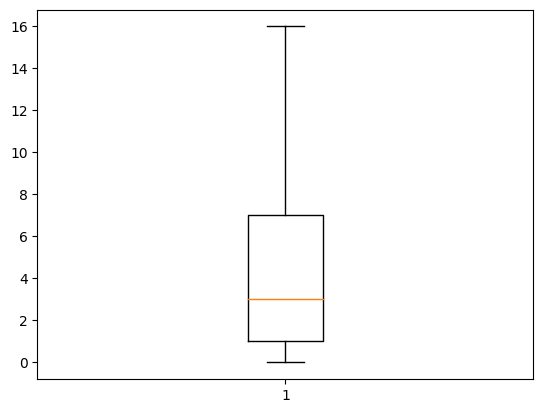

In [ ]:
plt.boxplot(df['fc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e791f181b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7e791f181030>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e791f180be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e791f1811e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e791f1804f0>],
 'means': []}

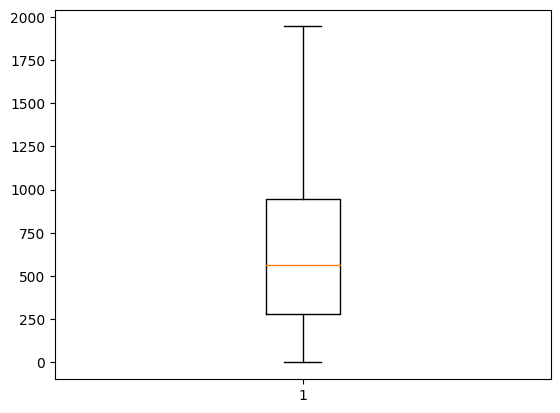

In [ ]:
plt.boxplot(df['px_height'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here, I used the IQR method and Capping method, capping outliers up to the 75th percentile. Beyond that, outliers were converted to the upper limit value. After applying the IQR method, all the outliers have been removed.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,battery_power,9.852110
1,blue,1.987657
2,clock_speed,4.353397
3,dual_sim,2.038924
4,fc,3.445063
5,four_g,3.194451
6,int_memory,3.979338
7,m_dep,3.952411
8,mobile_wt,14.709507
9,n_cores,4.707532


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
df['screen_size'] = df[['sc_h','sc_w']].mean(axis=1).round(2)

In [ ]:
df['pixels'] = df[['px_height','px_width']].mean(axis=1).round(2)

In [ ]:
df.drop(columns=['sc_h','sc_w','px_height','px_width'],axis=1,inplace=True)

In [ ]:
dependent_variable = 'price_range'

In [ ]:
independent_variable = list(set(df.columns.tolist()) - {dependent_variable})

In [ ]:
X = df[independent_variable].values
y = df[dependent_variable].values

##### What all feature selection methods have you used  and why?

Here, I have used the variance inflation factor to check for variance inflation among variables.Answer Here.

##### Which all features you found important and why?

"I have created two new features:

1 - Screen_size:

I calculated the mean values of both 'sc_h' and 'sc_w' to create this feature.
2 - Pixels:

For this column, I computed the mean value of both 'px_height' and 'px_width' to create the feature.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

We don't need to use any transformation technique,because the dataset has already normally distributed.

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[-1.00601811, -1.38064353,  0.98609664, ..., -1.78686097,
        -0.76694788, -1.3057501 ],
       [ 0.99401789,  1.15502422, -1.01409939, ...,  0.55964063,
        -0.99977966, -0.64598879],
       [ 0.99401789,  0.49354568, -1.01409939, ...,  0.55964063,
        -0.5341161 , -0.64598879],
       ...,
       [ 0.99401789,  0.21792962, -1.01409939, ...,  0.55964063,
        -0.76694788, -1.14080978],
       [ 0.99401789,  0.76916174,  0.98609664, ...,  0.55964063,
        -0.06845254, -0.81092912],
       [ 0.99401789,  0.71403853,  0.98609664, ...,  0.55964063,
         0.16437924,  1.00341448]])

##### Which method have you used to scale you data and why?

Here i have StandardScaler. StandardScaler is used for transforming features by centering them around zero and scaling them to unit variance

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimesionality Reduction is not required here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why?

I have used 80% data for the traning and 20% for the testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No,the data is not imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: title={'center': 'count (price_range)'}>

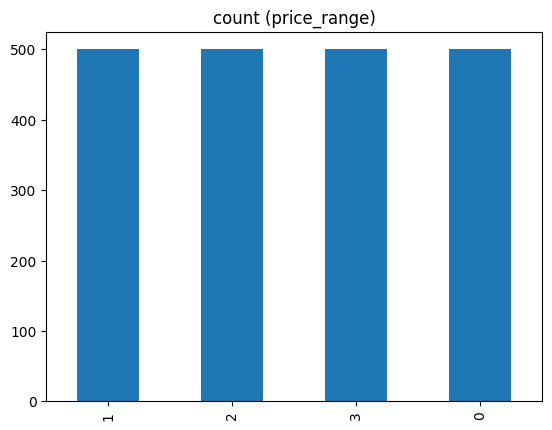

In [ ]:
df['price_range'].value_counts().plot(kind='bar', title='count (price_range)')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The data is not imbalanced.therefore we don't need to use any technique here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
Regressor = LogisticRegression(fit_intercept=True, max_iter=10000)


# Fit the Algorithm
Regressor.fit(X_train,y_train)

# Predict on the model
X_train_pred = Regressor.predict(X_train)
X_test_pred = Regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
Regressor.coef_

array([[ 6.42531120e-01,  2.72708262e-02,  4.67126133e-01,
         8.14290468e-01,  3.03396120e-01,  6.73825988e-01,
        -2.70473034e-03,  3.72970984e-01, -6.22780549e-03,
         9.05469038e-02, -2.18192438e-03,  1.54138046e-01,
         4.89117579e-01,  2.83805684e-01,  3.89946994e-02,
         5.85194844e-01, -2.40040141e-02,  5.46461525e-02],
       [ 1.17575816e-01,  1.04852141e-02,  1.97435328e-01,
         8.82372368e-02,  3.02917326e-02,  2.27293329e-01,
        -2.24990044e-04,  1.40614117e-01, -9.90226637e-04,
         3.86091260e-02, -2.60506815e-04,  3.21382850e-02,
         4.63212262e-01,  1.27080595e-01,  1.16333388e-02,
         1.28054515e-01,  2.67550666e-02,  4.41316269e-03],
       [-3.56000613e-01, -1.53364387e-02, -2.20392829e-01,
        -2.44541428e-01, -7.34631628e-02, -3.14165373e-01,
         8.87162348e-04, -3.57574795e-01,  2.23363190e-03,
        -3.90743466e-02,  8.26191318e-04, -5.97884003e-02,
        -3.17876997e-01, -1.28765047e-01, -1.03472475e

In [ ]:
Regressor.intercept_

array([ 1.51808578,  0.59921769, -0.09902139, -2.01828208])

In [ ]:
# calculating accuracy on train set
train_accuracy = accuracy_score(X_train_pred,y_train)
print("The accuracy on train data is -", train_accuracy*100)

The accuracy on train data is - 76.75


In [ ]:
# calculating accuracy on test set
test_accuracy = accuracy_score(X_test_pred,y_test)
print("The accuracy on test data is -", test_accuracy*100)

The accuracy on test data is - 76.25


In [ ]:
# calculating precision on the test set
log_precision = precision_score(y_test, X_test_pred, average='weighted')
print("The precision on test dataset is", log_precision*100)

The precision on test dataset is 76.86512094537429


In [ ]:
# calculating recall on the test set
log_recall = recall_score(y_test, X_test_pred, average='weighted')
print("The recall on test dataset is", log_recall*100)

The recall on test dataset is 76.25


In [ ]:
confusion_matrix(y_test,X_test_pred)

array([[92, 13,  0,  0],
       [ 6, 63, 21,  1],
       [ 0, 18, 57, 17],
       [ 0,  0, 19, 93]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
confusion_log_matrix = confusion_matrix(y_test,X_test_pred)

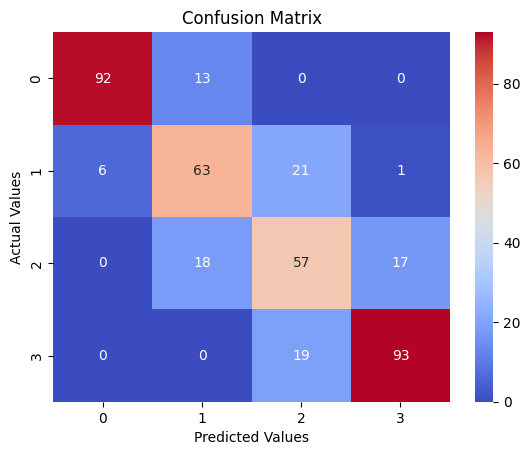

In [ ]:
# Visualizing evaluation Metric Score chart
ax = sns.heatmap(confusion_log_matrix, annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'C':[0.01,0.1,1,10,100,110]}
grid = GridSearchCV(LogisticRegression(max_iter=1000),parameters,n_jobs=-1)
grid.fit(X_train,y_train)

# Fit the Algorithm
print("The best fit C value is found out to be :" ,grid.best_params_)
print("\nUsing ",grid.best_params_, " best score is: ", grid.best_score_)
best_score_cross = grid.best_estimator_
# Predict on the model
grid.score(X_train,y_train)

The best fit C value is found out to be : {'C': 100}

Using  {'C': 100}  best score is:  0.686875


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.699375

In [ ]:
X_train_log = best_score_cross.predict(X_train)
X_test_log = best_score_cross.predict(X_test)

In [ ]:
# calculating accuracy on train and test set
log_train_accuracy = accuracy_score(y_train, X_train_log)
print("The accuracy on train dataset is", log_train_accuracy*100)

The accuracy on train dataset is 69.9375


In [ ]:
# calculating accuracy on test set
log_test_accuracy = accuracy_score(y_test, X_test_log)
print("The accuracy on test dataset is", log_test_accuracy*100)

The accuracy on test dataset is 70.0


In [ ]:
# calculating precision on the test set
log_precision = precision_score(y_test, X_test_log, average='weighted')
print("The precision on test dataset is", log_precision*100)

The precision on test dataset is 70.38688379792089


In [ ]:
# calculating recall on the test set
log_recall = recall_score(y_test, X_test_log, average='weighted')
print("The recall on test dataset is", log_recall*100)

The recall on test dataset is 70.0


In [ ]:
log_confusion_matrix = confusion_matrix(y_test,X_test_log)

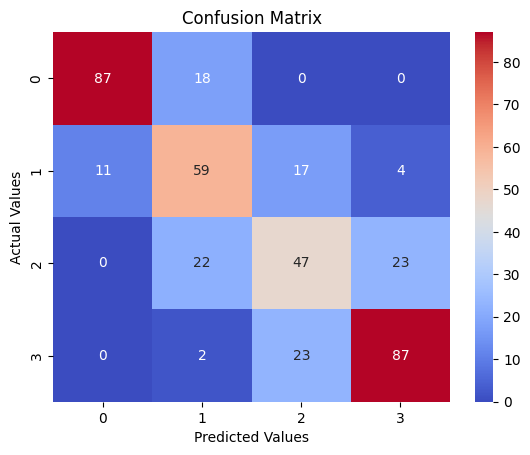

In [ ]:
ax = sns.heatmap(log_confusion_matrix, annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before and after applying GridSearchCV hyperparameter :-

precision score :-The Testing [PRECISION SCORE] was (76.86). However, after applying hyperparameter tuning,the Testing [PRECISION SCORE] is (70.38).

recall_score :- The Testing [recall_score] was (70.25). However, after applying hyperparameter tuning,the Testing [recall_score] is (70.0).

In [ ]:
print(classification_report(y_test,X_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       105
           1       0.67      0.69      0.68        91
           2       0.59      0.62      0.60        92
           3       0.84      0.83      0.83       112

    accuracy                           0.76       400
   macro avg       0.76      0.75      0.76       400
weighted avg       0.77      0.76      0.77       400



In [ ]:
print(classification_report(y_test,X_test_log))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       105
           1       0.58      0.65      0.61        91
           2       0.54      0.51      0.53        92
           3       0.76      0.78      0.77       112

    accuracy                           0.70       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.70      0.70      0.70       400



### ML Model - 2

In [ ]:
decision_tree_clasif = DecisionTreeClassifier(random_state=0)

In [ ]:
decision_tree_clasif.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
X_train_dec_tre_classifier = decision_tree_clasif.predict(X_train)
X_test_dec_tre_classifier = decision_tree_clasif.predict(X_test)

In [ ]:
# calculating accuracy on train and test set
dec_t_train_accuracy = accuracy_score(y_train, X_train_dec_tre_classifier)
print("The accuracy on train dataset is", dec_t_train_accuracy*100)

The accuracy on train dataset is 100.0


In [ ]:
# calculating accuracy on test set
dec_t_test_accuracy = accuracy_score(y_test, X_test_dec_tre_classifier)
print("The accuracy on test dataset is", dec_t_test_accuracy*100)

The accuracy on test dataset is 87.25


In [ ]:
# calculating precision on the test set
dec_t_fr_precision = precision_score(y_test, X_test_dec_tre_classifier, average='weighted')
print("The precision on test dataset is", dec_t_fr_precision*100)

The precision on test dataset is 87.90324558784346


In [ ]:
# calculating recall on the test set
dec_t_fr_recall = recall_score(y_test, X_test_dec_tre_classifier, average='weighted')
print("The recall on test dataset is", dec_t_fr_recall*100)

The recall on test dataset is 87.25


In [ ]:
confusion_matrix(y_test,X_test_dec_tre_classifier)

array([[ 92,  13,   0,   0],
       [  3,  79,   9,   0],
       [  0,   9,  77,   6],
       [  0,   0,  11, 101]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
dec_t_confusion_matrix = confusion_matrix(y_test,X_test_dec_tre_classifier)

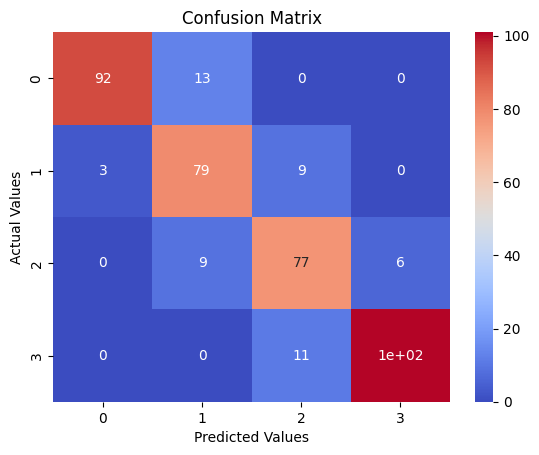

In [ ]:
# Visualizing evaluation Metric Score chart
ax = sns.heatmap(dec_t_confusion_matrix, annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
decision_tree_cross= DecisionTreeClassifier(random_state=0)


param_grid_dec_t_classifier = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5,6,9,10,11,12,13,14,15],
             'splitter':['best','random'],
             'min_samples_split':[3,5,10],
             'max_features':['auto','sqrt','log2',None]}

dec_t_cross = GridSearchCV(decision_tree_cross,param_grid=param_grid_dec_t_classifier,cv=5,scoring='accuracy',verbose=3)

# Fit the Algorithm
dec_t_cross.fit(X_train,y_train)

# Predict on the model
best_model_dec_t_classifier = dec_t_cross.best_estimator_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.516 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.562 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.519 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.547 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=best;, score=0.519 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.372 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=auto, min_samples_split=3, splitter=random;, score=0.253 total time=   0.0s
[CV 3/5] END criterion=gini, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.372 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.253 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.237 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.263 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.259 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.516 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.562 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=10, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.412 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.291 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.394 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=5, splitter=random;, score=0.388 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, splitter=best;, score=0.597 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, splitter=best;, score=0.625 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, splitter=best;, score=0.600 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_split=10, sp

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, splitter=random;, score=0.344 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, splitter=random;, score=0.347 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=3, splitter=random;, score=0.287 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=5, splitter=best;, score=0.609 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=5, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=5, splitter=best;, score=0.678 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=5, splitter=best;, score=0.575 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_split=5, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.659 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.678 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.575 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.644 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.459 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.297 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.344 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_split=3, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.378 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.509 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=3, splitter=random;, score=0.272 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best;, score=0.628 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=best;, score=0.619 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=5, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.456 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.378 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.422 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_split=10, splitter=random;, score=0.297 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.628 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.613 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_split=3, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.706 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.644 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.734 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=best;, score=0.619 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.497 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.494 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=random;, score=0.366 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_split=3, splitter=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.706 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.644 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.734 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.619 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.497 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.494 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=ra

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=best;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=best;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.562 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.484 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.381 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.416 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=5, splitter=random;, score=0.641 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_split=10, spli

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.641 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.741 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=best;, score=0.725 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.588 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.516 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=10, splitter=random;, score=0.512 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.744 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=best;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.466 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.631 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.453 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_split=5, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.353 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.678 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.744 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.713 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.466 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_split=5, spl

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.466 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.491 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.466 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.709 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.741 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.631 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, splitter=best;, score=0.672 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_split=5, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.541 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.412 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.419 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.569 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.406 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.709 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=random;, score=0.519 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=random;, score=0.494 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=random;, score=0.447 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=random;, score=0.478 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=5, splitter=random;, score=0.453 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_spli

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=best;, score=0.678 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.528 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.506 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.491 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.603 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.444 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.541 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.412 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.419 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.569 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.406 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_split=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.438 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.438 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.566 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.703 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.709 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.625 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.572 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.503 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.453 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.719 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.666 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_split=10, splitter=random;, score=0.491 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.681 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.672 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.675 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_split=3, sp

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=best;, score=0.716 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.559 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.444 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.516 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.603 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=3, splitter=random;, score=0.422 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 3/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=best;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=best;, score=0.675 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=best;, score=0.656 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=random;, score=0.537 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=random;, score=0.469 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=random;, score=0.559 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_split=10, splitter=random;, score=0.644 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=15, max_features=auto, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.519 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.547 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.525 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.372 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.253 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.237 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.263 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=2, max_features=sqrt, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.606 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.547 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=best;, score=0.562 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.391 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.412 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.291 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_split=3, splitter=random;, score=0.422 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.578 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.584 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.456 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.291 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.350 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.284 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.287 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, m

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=5, splitter=random;, score=0.372 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=5, splitter=random;, score=0.384 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=5, splitter=random;, score=0.303 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.675 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.644 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.625 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_split=10, splitter=best;, score=0.609 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, mi

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.372 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.319 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.394 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_split=5, splitter=best;, score=0.697 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.569 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.463 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.506 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=5, splitter=random;, score=0.369 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.672 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.650 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_split=10, splitter=best;, score=0.794 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, m

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, splitter=random;, score=0.441 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, splitter=random;, score=0.419 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=3, splitter=random;, score=0.591 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.675 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, splitter=best;, score=0.681 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.797 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.703 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.703 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.531 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.406 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, 

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.438 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.572 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.588 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=5, splitter=random;, score=0.653 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_split=10, splitter=best;, score=0.747 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.756 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.703 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.706 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.512 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.516 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt,

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=best;, score=0.694 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=best;, score=0.681 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=best;, score=0.688 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=best;, score=0.703 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.519 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.541 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=3, splitter=random;, score=0.416 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=5, splitter=random;, score=0.447 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.716 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.728 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.728 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=10, splitter=best;, score=0.709 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_split=10, splitter=random;, score=0.487 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=best;, score=0.675 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.509 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.469 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.509 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.591 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=3, splitter=random;, score=0.597 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=5, splitter=best;, score=0.700 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.550 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.453 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_split=10, splitter=random;, score=0.569 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.697 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.697 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=s

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.722 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.781 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.694 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=best;, score=0.675 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.534 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.478 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=3, splitter=random;, score=0.550 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=aut

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho


[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.556 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.559 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.572 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.500 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=5, splitter=random;, score=0.416 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_split=10, splitter=best;, score=0.759 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_feature

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.684 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.659 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=best;, score=0.694 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=random;, score=0.600 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=random;, score=0.588 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=random;, score=0.484 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=auto, min_samples_split=5, splitter=random;, score=0.541 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=au

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.653 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=best;, score=0.675 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.547 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.588 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.503 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.534 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_split=3, splitter=random;, score=0.463 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=15, max_features=

In [ ]:
dec_t_cross.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': None,
 'min_samples_split': 10,
 'splitter': 'best'}

In [ ]:
dec_t_cross.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=10,
                       random_state=0)

In [ ]:
best_model_dec_t_classifier.feature_importances_

array([0.        , 0.00215181, 0.00300553, 0.0046861 , 0.        ,
       0.        , 0.14201074, 0.        , 0.69747275, 0.        ,
       0.12770001, 0.00221191, 0.00175086, 0.        , 0.01494627,
       0.        , 0.00230207, 0.00176195])

In [ ]:
Dec_T_X_train = best_model_dec_t_classifier.predict(X_train)
DEC_T_fr_X_test = best_model_dec_t_classifier.predict(X_test)

In [ ]:
# calculating accuracy on train set
DEC_T_cross_train_accuracy = accuracy_score(y_train, Dec_T_X_train)
print("The accuracy on train dataset is", DEC_T_cross_train_accuracy*100)

The accuracy on train dataset is 97.5


In [ ]:
# calculating accuracy on test set
DEC_T_cross_test_accuracy = accuracy_score(y_test, DEC_T_fr_X_test)
print("The accuracy on test dataset is", DEC_T_cross_test_accuracy*100)

The accuracy on test dataset is 85.75


In [ ]:
# calculating precision on the test set
DEC_T_cross_log_precision = precision_score(y_test, DEC_T_fr_X_test, average='weighted')
print("The precision on test dataset is", DEC_T_cross_log_precision*100)

The precision on test dataset is 86.04765795206971


In [ ]:
# calculating recall on the test set
DEC_T_cross_log_recall = recall_score(y_test, DEC_T_fr_X_test, average='weighted')
print("The recall on test dataset is", DEC_T_cross_log_recall*100)

The recall on test dataset is 85.75


In [ ]:
confusion_matrix(y_test,DEC_T_fr_X_test)

array([[96,  9,  0,  0],
       [ 4, 81,  6,  0],
       [ 0, 12, 69, 11],
       [ 0,  0, 15, 97]])

In [ ]:
dec_t_confusion_cross_matrix = confusion_matrix(y_test,DEC_T_fr_X_test)

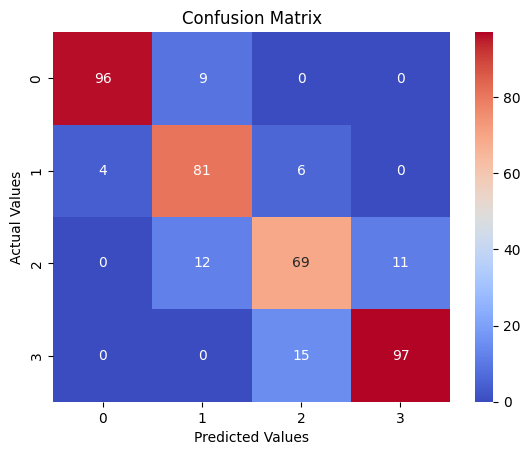

In [ ]:
ax = sns.heatmap(dec_t_confusion_cross_matrix, annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before and after applying GridSearchCV hyperparameter :-

precision score :-The Testing [PRECISION SCORE] was (87.90). However, after applying hyperparameter tuning,the Testing [PRECISION SCORE] is (86.04).

recall_score :- The Testing [recall_score] was (87.25). However, after applying hyperparameter tuning,the Testing [recall_score] is (85.75).

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In [ ]:
print(classification_report(y_test,X_test_dec_tre_classifier))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       105
           1       0.78      0.87      0.82        91
           2       0.79      0.84      0.81        92
           3       0.94      0.90      0.92       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.87      0.87       400



In [ ]:
print(classification_report(y_test,DEC_T_fr_X_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       105
           1       0.79      0.89      0.84        91
           2       0.77      0.75      0.76        92
           3       0.90      0.87      0.88       112

    accuracy                           0.86       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.86      0.86      0.86       400



### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
xgb_model = XGBClassifier(objective='multi:softprob')

# Fit the Algorithm
xgb_model.fit(X_train,y_train)

# Predict on the model
XG_X_train_pred = xgb_model.predict(X_train)
XG_X_test_pred = xgb_model.predict(X_test)

In [ ]:
# calculating accuracy on train set
XGB_train_accuracy = accuracy_score(y_train, XG_X_train_pred)
print("The accuracy on train dataset is", XGB_train_accuracy*100)

The accuracy on train dataset is 100.0


In [ ]:
# calculating accuracy on test set
XGB_test_accuracy = accuracy_score(y_test, XG_X_test_pred)
print("The accuracy on test dataset is", XGB_test_accuracy*100)

The accuracy on test dataset is 92.25


In [ ]:
# calculating precision on the test set
XGB_precision = precision_score(y_test, XG_X_test_pred, average='weighted')
print("The precision on test dataset is", XGB_precision*100)

The precision on test dataset is 92.5233791263203


In [ ]:
# calculating recall on the test set
XGB_recall = recall_score(y_test, XG_X_test_pred, average='weighted')
print("The recall on test dataset is", XGB_recall*100)

The recall on test dataset is 92.25


In [ ]:
confusion_matrix(y_test,XG_X_test_pred)

array([[ 97,   8,   0,   0],
       [  2,  88,   1,   0],
       [  0,   6,  81,   5],
       [  0,   0,   9, 103]])

In [ ]:
XGB_confusion_matrix = confusion_matrix(y_test,XG_X_test_pred)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

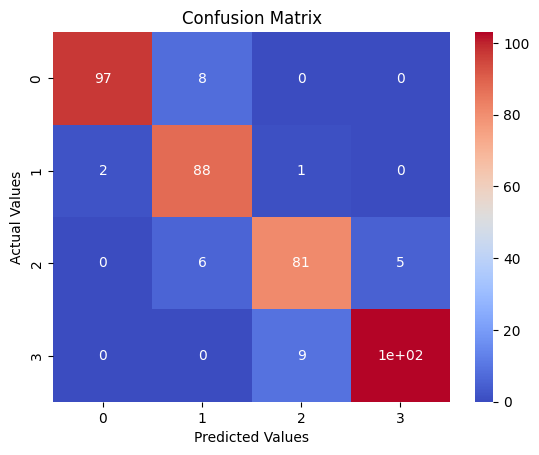

In [ ]:
# Visualizing evaluation Metric Score chart
ax = sns.heatmap(XGB_confusion_matrix, annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_XG = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [2,4,6,8],
    'learning_rate': [1,0.5,0.1,0.01],
    'subsample': [0.7, 0.8, 0.9]
}
XGB = GridSearchCV(estimator= xgb_model, param_grid=param_grid_XG, cv=10, scoring='accuracy')
# Fit the Algorithm
XGB.fit(X_train, y_train)

# Predict on the model
best_model_xgb = XGB.best_estimator_
X_train_XGB_cross = best_model_xgb.predict(X_train)
X_test_XGB_cross = best_model_xgb.predict(X_test)

In [ ]:
best_model_xgb.feature_importances_

array([0.00886246, 0.02626399, 0.0093766 , 0.02553269, 0.03426666,
       0.01521285, 0.12577362, 0.00695357, 0.44014728, 0.0241654 ,
       0.14213926, 0.02330332, 0.01983232, 0.01161905, 0.02898061,
       0.02287733, 0.01583822, 0.01885478], dtype=float32)

In [ ]:
# calculating accuracy on train and test set
XGB_cross_train_accuracy = accuracy_score(y_train, X_train_XGB_cross)
print("The accuracy on train dataset is", XGB_cross_train_accuracy*100)

The accuracy on train dataset is 100.0


In [ ]:
XGB_cross_test_accuracy = accuracy_score(y_test, X_test_XGB_cross)
print("The accuracy on test dataset is", XGB_cross_test_accuracy*100)

The accuracy on test dataset is 93.0


In [ ]:
# calculating precision on the test set
XGB_cross_precision = precision_score(y_test, X_test_XGB_cross, average='weighted')
print("The precision on test dataset is", XGB_cross_precision*100)

The precision on test dataset is 93.29267897669492


In [ ]:
# calculating recall on the test set
XGB_cross_recall = recall_score(y_test, X_test_XGB_cross, average='weighted')
print("The recall on test dataset is", XGB_cross_recall*100)

The recall on test dataset is 93.0


In [ ]:
confusion_matrix(y_test,X_test_XGB_cross)

array([[ 98,   7,   0,   0],
       [  2,  88,   1,   0],
       [  0,   7,  82,   3],
       [  0,   0,   8, 104]])

In [ ]:
XGB_cross_confusion_matrix = confusion_matrix(y_test,X_test_XGB_cross)

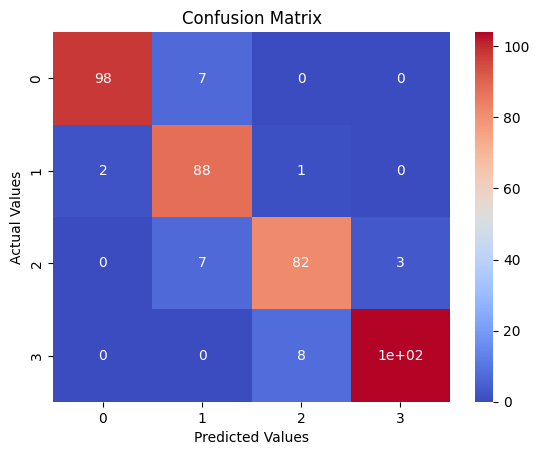

In [ ]:
ax = sns.heatmap(XGB_cross_confusion_matrix, annot=True, cmap='coolwarm')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Before and after applying GridSearchCV hyperparameter :-

precision score :-The Testing [PRECISION SCORE] was (92.52). However, after applying hyperparameter tuning,the Testing [PRECISION SCORE] is (93.29).

recall_score :- The Testing [recall_score] was (92.25). However, after applying hyperparameter tuning,the Testing [recall_score] is (93.0).

In [ ]:
print(classification_report(y_test,XG_X_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       105
           1       0.86      0.97      0.91        91
           2       0.89      0.88      0.89        92
           3       0.95      0.92      0.94       112

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400



In [ ]:
print(classification_report(y_test,X_test_XGB_cross))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       105
           1       0.86      0.97      0.91        91
           2       0.90      0.89      0.90        92
           3       0.97      0.93      0.95       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to consider accuracy_score,precision score and recall.

accuracy_score :- accuracy_score is a metric used to evaluate the performance of a classification model.

Here's how it works: True Positives (TP),True Negatives (TN),False Positives (FP) and False Negatives (FN).


precision_score :- Precision measures the accuracy of positive predictions. It tells you how many of the items the model predicted as positive are actually positive.


recall :- Recall tells you how many of the actual positive instances your model managed to capture. It's crucial in scenarios where missing positives is costly, like medical diagnoses or rare event detection. High recall means fewer missed positives

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would like to choose the XGBoostClassifier as my final model because it is providing good training and testing scores in terms of precision and recall metrics.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I am using XGBoostClassifier model for model explainability.

In [ ]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = indices

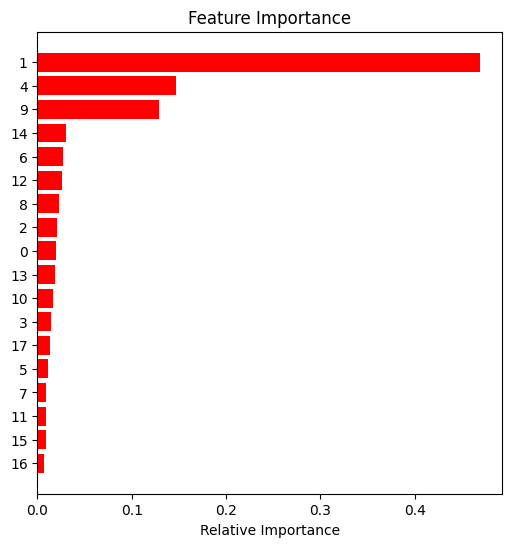

In [ ]:
plt.figure(figsize=(6, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

new_data = '/content/drive/MyDrive/data_mobile_price_range.csv.pkl'
pickle.dump(xgb_model, open(new_data, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
new_data = '/content/drive/MyDrive/data_mobile_price_range.csv.pkl'
mobile_price_data_project_file = pickle.load(open(new_data, 'rb'))

In [ ]:
mobile_data = mobile_price_data_project_file.predict(X_test)
accuracy_score(y_test,mobile_data)*100

92.25

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After analyzing the dataset, I discovered that features such as RAM, battery power, etc., are pivotal in determining the price of a mobile phone.

- Our EDA analysis indicates a direct correlation between increased RAM in a mobile phone and its price.
- Battery power is equally influential in determining the price of a mobile device.
- RAM, battery power, and pixel can play significant roles in defining the price range of a mobile phone.

Overall The XGBoost model performs exceptionally well on both the training and testing data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***